In [7]:
import pandas as pd
import numpy as np

model_df = pd.read_csv("C:/Python_practice/DL_project/final_project/no_Yongsan_yes_Doksan/DA/dataset/smartphone_data_modeling_v1.csv")
model_df.head(20)

,price,quality,favoritecount,viewcount,cost,screen_size,capacity,ram,weight,back_camera_1,back_camera_number_1,back_camera_2,back_camera_number_2,back_camera_3,back_camera_number_3,maximum_battery_lif,Max_audio_playback_time,battery_capacity,hours,video_streaming_playback
0,450000,3,0.000000,0.000000,1160000,13.70,256.0,4,0.133,1200,2,0,0,0,0,10.0,50.0,2227,0.016667,50.0
1,530000,2,0.000000,0.000308,1020000,15.40,128.0,4,0.162,1200,2,0,0,0,0,11.0,65.0,2815,0.016667,65.0
2,900000,3,0.000000,0.000000,1500000,15.40,512.0,4,0.173,1200,2,0,0,0,0,15.0,75.0,3227,0.033333,75.0
3,560000,2,0.000000,0.000217,950000,13.70,128.0,4,0.140,1200,2,0,0,0,0,13.0,55.0,2406,0.050000,55.0
4,450000,3,0.000000,0.000000,1160000,13.70,256.0,4,0.133,1200,2,0,0,0,0,10.0,50.0,2227,0.083333,50.0
5,500000,2,0.000008,0.000367,1020000,15.40,128.0,4,0.162,1200,2,0,0,0,0,11.0,65.0,2815,0.083333,65.0
6,1220000,1,0.000000,0.000233,1550000,15.50,128.0,6,0.206,1200,2,4800,1,0,0,20.0,75.0,3200,0.083333,75.0
7,450000,1,0.000000,0.000008,1350000,15.40,128.0,6,0.187,1200,3,0,0,0,0,11.0,65.0,2815,0.100000,65.0
8,600000,2,0.000000,0.000000,950000,13.70,128.0,4,0.140,1200,2,0,0,0,0,13.0,55.0,2406,0.100000,55.0
9,420000,3,0.000000,0.000000,1397000,17.16,256.0,12,0.196,1200,2,1600,1,0,0,19.0,50.0,4300,0.116667,61.0


## 모델링을 위한 전처리 <br>
(1) 로그변환 <br>
(2) 정규화(minmaxscaler) or 표준화(standardscaler) <br>
(3) train, test 나누기 <br>

종속변수(y) : price <br>

## 로그 변환

In [8]:
# object 열 category로 타입 변환
model_df['quality'] = model_df['quality'].astype('category')
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13778 entries, 0 to 13777
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   price                     13778 non-null  int64   
 1   quality                   13778 non-null  category
 2   favoritecount             13778 non-null  float64 
 3   viewcount                 13778 non-null  float64 
 4   cost                      13778 non-null  int64   
 5   screen_size               13778 non-null  float64 
 6   capacity                  13778 non-null  float64 
 7   ram                       13778 non-null  int64   
 8   weight                    13778 non-null  float64 
 9   back_camera_1             13778 non-null  int64   
 10  back_camera_number_1      13778 non-null  int64   
 11  back_camera_2             13778 non-null  int64   
 12  back_camera_number_2      13778 non-null  int64   
 13  back_camera_3             13778 non-null  int6

In [9]:
# 로그변환 전 0인 데이터가 존재하는 열에 0.001 추가하기 (최대한 데이터 손상을 막기 위해)
columns_to_update = ['favoritecount', 'viewcount', 'back_camera_2', 
                     'back_camera_number_2', 'back_camera_3', 'back_camera_number_3']

# 각 열에 0.001 더하기
for column in columns_to_update:
    model_df[column] = model_df[column].apply(lambda x: x + 0.001)

model_df.head(15)

,price,quality,favoritecount,viewcount,cost,screen_size,capacity,ram,weight,back_camera_1,back_camera_number_1,back_camera_2,back_camera_number_2,back_camera_3,back_camera_number_3,maximum_battery_lif,Max_audio_playback_time,battery_capacity,hours,video_streaming_playback
0,450000,3,0.001000,0.001000,1160000,13.70,256.0,4,0.133,1200,2,0.001,0.001,0.001,0.001,10.0,50.0,2227,0.016667,50.0
1,530000,2,0.001000,0.001308,1020000,15.40,128.0,4,0.162,1200,2,0.001,0.001,0.001,0.001,11.0,65.0,2815,0.016667,65.0
2,900000,3,0.001000,0.001000,1500000,15.40,512.0,4,0.173,1200,2,0.001,0.001,0.001,0.001,15.0,75.0,3227,0.033333,75.0
3,560000,2,0.001000,0.001217,950000,13.70,128.0,4,0.140,1200,2,0.001,0.001,0.001,0.001,13.0,55.0,2406,0.050000,55.0
4,450000,3,0.001000,0.001000,1160000,13.70,256.0,4,0.133,1200,2,0.001,0.001,0.001,0.001,10.0,50.0,2227,0.083333,50.0
5,500000,2,0.001008,0.001367,1020000,15.40,128.0,4,0.162,1200,2,0.001,0.001,0.001,0.001,11.0,65.0,2815,0.083333,65.0
6,1220000,1,0.001000,0.001233,1550000,15.50,128.0,6,0.206,1200,2,4800.001,1.001,0.001,0.001,20.0,75.0,3200,0.083333,75.0
7,450000,1,0.001000,0.001008,1350000,15.40,128.0,6,0.187,1200,3,0.001,0.001,0.001,0.001,11.0,65.0,2815,0.100000,65.0
8,600000,2,0.001000,0.001000,950000,13.70,128.0,4,0.140,1200,2,0.001,0.001,0.001,0.001,13.0,55.0,2406,0.100000,55.0
9,420000,3,0.001000,0.001000,1397000,17.16,256.0,12,0.196,1200,2,1600.001,1.001,0.001,0.001,19.0,50.0,4300,0.116667,61.0


In [10]:
### 로그변환 (quality, price 열 제외)
def log_transform(dataframe, columns):
    '''
    데이터프레임과 컬럼을 인자로 받아서
    로그 변환이 적용된 데이터프레임을 반환하는 함수입니다.
    '''
    for column in columns:
        if column not in ['quality', 'price']:
            filtered = dataframe[column][dataframe[column] > 0] # filter out negative or zero values
            dataframe[column] = np.log(filtered) # apply log transformation
    return dataframe

log_df = log_transform(model_df, model_df.columns)
log_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13778 entries, 0 to 13777
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   price                     13778 non-null  int64   
 1   quality                   13778 non-null  category
 2   favoritecount             13778 non-null  float64 
 3   viewcount                 13778 non-null  float64 
 4   cost                      13778 non-null  float64 
 5   screen_size               13778 non-null  float64 
 6   capacity                  13778 non-null  float64 
 7   ram                       13778 non-null  float64 
 8   weight                    13778 non-null  float64 
 9   back_camera_1             13778 non-null  float64 
 10  back_camera_number_1      13778 non-null  float64 
 11  back_camera_2             13778 non-null  float64 
 12  back_camera_number_2      13778 non-null  float64 
 13  back_camera_3             13778 non-null  floa

In [11]:
log_df.head(10)

,price,quality,favoritecount,viewcount,cost,screen_size,capacity,ram,weight,back_camera_1,back_camera_number_1,back_camera_2,back_camera_number_2,back_camera_3,back_camera_number_3,maximum_battery_lif,Max_audio_playback_time,battery_capacity,hours,video_streaming_playback
0,450000,3,-6.907755,-6.907755,13.963931,2.617396,5.545177,1.386294,-2.017406,7.090077,0.693147,-6.907755,-6.907755,-6.907755,-6.907755,2.302585,3.912023,7.708411,-4.094345,3.912023
1,530000,2,-6.907755,-6.639001,13.835313,2.734368,4.852030,1.386294,-1.820159,7.090077,0.693147,-6.907755,-6.907755,-6.907755,-6.907755,2.397895,4.174387,7.942718,-4.094345,4.174387
2,900000,3,-6.907755,-6.907755,14.220976,2.734368,6.238325,1.386294,-1.754464,7.090077,0.693147,-6.907755,-6.907755,-6.907755,-6.907755,2.708050,4.317488,8.079308,-3.401197,4.317488
3,560000,2,-6.907755,-6.711640,13.764217,2.617396,4.852030,1.386294,-1.966113,7.090077,0.693147,-6.907755,-6.907755,-6.907755,-6.907755,2.564949,4.007333,7.785721,-2.995732,4.007333
4,450000,3,-6.907755,-6.907755,13.963931,2.617396,5.545177,1.386294,-2.017406,7.090077,0.693147,-6.907755,-6.907755,-6.907755,-6.907755,2.302585,3.912023,7.708411,-2.484907,3.912023
5,500000,2,-6.899456,-6.595381,13.835313,2.734368,4.852030,1.386294,-1.820159,7.090077,0.693147,-6.907755,-6.907755,-6.907755,-6.907755,2.397895,4.174387,7.942718,-2.484907,4.174387
6,1220000,1,-6.907755,-6.698035,14.253765,2.740840,4.852030,1.791759,-1.579879,7.090077,0.693147,8.476371,0.001000,-6.907755,-6.907755,2.995732,4.317488,8.070906,-2.484907,4.317488
7,450000,1,-6.907755,-6.899456,14.115615,2.734368,4.852030,1.791759,-1.676647,7.090077,1.098612,-6.907755,-6.907755,-6.907755,-6.907755,2.397895,4.174387,7.942718,-2.302585,4.174387
8,600000,2,-6.907755,-6.907755,13.764217,2.617396,4.852030,1.386294,-1.966113,7.090077,0.693147,-6.907755,-6.907755,-6.907755,-6.907755,2.564949,4.007333,7.785721,-2.302585,4.007333
9,420000,3,-6.907755,-6.907755,14.149838,2.842581,5.545177,2.484907,-1.629641,7.090077,0.693147,7.377760,0.001000,-6.907755,-6.907755,2.944439,3.912023,8.366370,-2.148434,4.110874


In [12]:
log_df.describe()

,price,favoritecount,viewcount,cost,screen_size,capacity,ram,weight,back_camera_1,back_camera_number_1,back_camera_2,back_camera_number_2,back_camera_3,back_camera_number_3,maximum_battery_lif,Max_audio_playback_time,battery_capacity,hours,video_streaming_playback
count,1.377800e+04,13778.000000,13778.000000,13778.000000,13778.000000,13778.000000,13778.000000,13778.000000,1.377800e+04,13778.000000,13778.000000,13778.000000,13778.000000,13778.000000,13778.000000,13778.000000,13778.000000,13778.000000,13778.000000
mean,7.840853e+05,-6.903101,-6.767478,14.112826,2.800231,5.427160,2.153819,-1.661966,7.090077e+00,0.695626,3.032529,-2.126772,-6.115855,-6.550734,2.852906,4.204284,8.241988,4.873201,4.160273
std,3.272174e+05,0.028152,0.275031,0.173131,0.073738,0.477499,0.441766,0.128002,1.640525e-12,0.203886,6.650214,3.195351,3.395542,1.529469,0.211677,0.165812,0.196602,1.937957,0.128565
min,4.010000e+05,-6.907755,-6.907755,13.384728,2.476538,4.158883,1.098612,-2.017406,7.090077e+00,0.000000,-6.907755,-6.907755,-6.907755,-6.907755,2.079442,2.833213,7.507141,-4.094345,3.688879
25%,5.200000e+05,-6.907755,-6.895585,14.115615,2.734368,4.852030,1.791759,-1.676647,7.090077e+00,0.693147,-6.907755,-6.907755,-6.907755,-6.907755,2.890372,4.025352,8.079308,3.637586,4.110874
50%,6.850000e+05,-6.907755,-6.859937,14.149838,2.842581,5.545177,2.484907,-1.629641,7.090077e+00,0.693147,7.377760,0.001000,-6.907755,-6.907755,2.944439,4.219508,8.366370,4.969813,4.110874
75%,9.900000e+05,-6.903682,-6.758280,14.149838,2.842581,5.545177,2.484907,-1.629641,7.090077e+00,0.693147,7.377760,0.001000,-6.907755,-6.907755,2.944439,4.317488,8.366370,6.545350,4.174387
max,2.500000e+06,-5.334473,-1.803778,14.690146,2.960105,6.907755,2.772589,-1.265848,7.090077e+00,1.098612,8.764053,0.693647,9.287302,0.001000,3.295837,4.709530,8.517193,9.072457,4.709530


In [13]:
# 정규화
def get_minmax_scaler(df, exclude_columns=['quality', 'price']):
    '''
    quality(카테고리형), price(종속변수) 열을 제외한 스케일링 함수
    '''
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    scaled_df = df.copy()

    for column in df.columns:
        if column not in exclude_columns: 
            scaled_values = scaler.fit_transform(scaled_df[[column]])  # Scale the values
            scaled_df[column] = scaled_values  # Assign the scaled values back to the dataframe

    return scaled_df

scaled_df = get_minmax_scaler(log_df)
scaled_df.head(5)

,price,quality,favoritecount,viewcount,cost,screen_size,capacity,ram,weight,back_camera_1,back_camera_number_1,back_camera_2,back_camera_number_2,back_camera_3,back_camera_number_3,maximum_battery_lif,Max_audio_playback_time,battery_capacity,hours,video_streaming_playback
0,450000,3,0.0,0.000000,0.443692,0.291289,0.504314,0.171856,0.000000,0.0,0.63093,0.0,0.0,0.0,0.0,0.183447,0.574961,0.199267,0.000000,0.218629
1,530000,2,0.0,0.052656,0.345166,0.533182,0.252157,0.171856,0.262451,0.0,0.63093,0.0,0.0,0.0,0.0,0.261801,0.714791,0.431242,0.000000,0.475685
2,900000,3,0.0,0.000000,0.640598,0.533182,0.756471,0.171856,0.349863,0.0,0.63093,0.0,0.0,0.0,0.0,0.516780,0.791058,0.566473,0.052644,0.615890
3,560000,2,0.0,0.038424,0.290704,0.291289,0.252157,0.171856,0.068249,0.0,0.63093,0.0,0.0,0.0,0.0,0.399137,0.625758,0.275807,0.083438,0.312010
4,450000,3,0.0,0.000000,0.443692,0.291289,0.504314,0.171856,0.000000,0.0,0.63093,0.0,0.0,0.0,0.0,0.183447,0.574961,0.199267,0.122235,0.218629


In [14]:
scaled_df.to_csv("C:/Python_practice/DL_project/final_project/no_Yongsan_yes_Doksan/DA/dataset/smartphone_minmaxscaled_modeling_v2.csv", index=False)

In [15]:
import pandas as pd
import numpy as np

scaled_df = pd.read_csv("C:/Python_practice/DL_project/final_project/no_Yongsan_yes_Doksan/DA/dataset/smartphone_minmaxscaled_modeling_v2.csv")
scaled_df.head(3)

,price,quality,favoritecount,viewcount,cost,screen_size,capacity,ram,weight,back_camera_1,back_camera_number_1,back_camera_2,back_camera_number_2,back_camera_3,back_camera_number_3,maximum_battery_lif,Max_audio_playback_time,battery_capacity,hours,video_streaming_playback
0,450000,3,0.0,0.000000,0.443692,0.291289,0.504314,0.171856,0.000000,0.0,0.63093,0.0,0.0,0.0,0.0,0.183447,0.574961,0.199267,0.000000,0.218629
1,530000,2,0.0,0.052656,0.345166,0.533182,0.252157,0.171856,0.262451,0.0,0.63093,0.0,0.0,0.0,0.0,0.261801,0.714791,0.431242,0.000000,0.475685
2,900000,3,0.0,0.000000,0.640598,0.533182,0.756471,0.171856,0.349863,0.0,0.63093,0.0,0.0,0.0,0.0,0.516780,0.791058,0.566473,0.052644,0.615890


## RandomForestRegressor 를 이용한 가격 예측

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
# 평가 지표
# ★ 평균 제곱 오차(MSE)  → 이상치가 적은 경우에는 MSE가 더 적합
# ★ 결정 계수(R2)

# n_estimators : 생성할 트리 개수

In [17]:
# 학습 데이터, 테스트 데이터 분리
x = scaled_df.loc[:, scaled_df.columns != 'price']
y = scaled_df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

In [18]:
# 모델 학습
random_f = RandomForestRegressor(n_estimators = 1000, criterion = 'squared_error')
random_f.fit(x_train, y_train)
y_pred = random_f.predict(x_test)

# 모델 평가
from evaluate_score import evaluate_score
evaluate_score(y_test, y_pred)

mse : 18289698501.487
rmse : 135239.412
r2 : 0.823


In [19]:
# 피처 중요도 확인
feat_labels = x.columns.tolist()
feature = list(zip(feat_labels, random_f.feature_importances_))
sorted(feature, key=lambda tup:tup[1], reverse = True)

[('Max_audio_playback_time', 0.6408971636960887),
 ('cost', 0.0950795618592801),
 ('hours', 0.06812307490583906),
 ('viewcount', 0.062146976126762656),
 ('quality', 0.05901234159832594),
 ('favoritecount', 0.027376841378411853),
 ('capacity', 0.017075487532420774),
 ('ram', 0.007342519667301696),
 ('weight', 0.006834009280548006),
 ('screen_size', 0.0035339540762856256),
 ('battery_capacity', 0.003075920327453053),
 ('back_camera_2', 0.002293662193124892),
 ('maximum_battery_lif', 0.001963878903944161),
 ('video_streaming_playback', 0.0017523143396202866),
 ('back_camera_number_2', 0.0014934068824686549),
 ('back_camera_3', 0.001001424577832024),
 ('back_camera_number_1', 0.0006962456778192794),
 ('back_camera_number_3', 0.0003012169764732453),
 ('back_camera_1', 0.0)]

## GradientBoost 를 이용한 가격 예측

In [23]:
import optuna
from sklearn.ensemble import GradientBoostingRegressor

def objectiveGBR(trial):
    # Define the search space for each parameter
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 4000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1),
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 15),
        'max_features': trial.suggest_categorical('max_features', [1.0, 'sqrt', 'log2']),
        'random_state': 42,
    }

    # 모델 학습
    model = GradientBoostingRegressor(**params)
    model.fit(x_train, y_train)

    # 예측
    y_pred = model.predict(x_test)

    # 모델 평가    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"mse : {mse}")
    print(f"rmse : {rmse}")
    print(f"r2 : {r2}")
    
    return mse

# optimization study 진행
# direction: score 값을 최대 or 최소로 하는 방향으로 지정
study3 = optuna.create_study(direction='minimize')

# n_trials: 시도 횟수 (미입력시 key interrupt가 있을 때까지 무한 반복)
study3.optimize(objectiveGBR, n_trials=100)

# 모든 트라이얼이 완료되었는지 확인
if study3.best_trial is None:
    print("No trials completed.")
else:
    # 최적의 트라이얼 출력
    print('Best trial: score {}, \nparams {}'.format(study3.best_trial.value, study3.best_trial.params))


[I 2023-06-13 14:51:34,311] A new study created in memory with name: no-name-e7ae6c77-7754-4017-816d-546422145539


[I 2023-06-13 14:52:03,040] Trial 0 finished with value: 31713867856.803967 and parameters: {'n_estimators': 496, 'learning_rate': 0.969895589060313, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': 1.0}. Best is trial 0 with value: 31713867856.803967.


mse : 31713867856.803967
rmse : 178083.87871113984
r2 : 0.6937220336150309


[I 2023-06-13 14:52:23,172] Trial 1 finished with value: 25027152287.229084 and parameters: {'n_estimators': 2514, 'learning_rate': 0.4982475180936983, 'max_depth': 9, 'min_samples_split': 6, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 1 with value: 25027152287.229084.


mse : 25027152287.229084
rmse : 158199.7227786101
r2 : 0.7582992607035497


[I 2023-06-13 14:53:01,954] Trial 2 finished with value: 25660368179.84983 and parameters: {'n_estimators': 1778, 'learning_rate': 0.5394668146643303, 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 12, 'max_features': 1.0}. Best is trial 1 with value: 25027152287.229084.


mse : 25660368179.84983
rmse : 160188.5394772355
r2 : 0.7521839525125017


[I 2023-06-13 14:54:01,305] Trial 3 finished with value: 24341088233.5366 and parameters: {'n_estimators': 2641, 'learning_rate': 0.4297271285306322, 'max_depth': 7, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 1.0}. Best is trial 3 with value: 24341088233.5366.


mse : 24341088233.5366
rmse : 156016.30758845885
r2 : 0.7649249521557413


[I 2023-06-13 14:54:21,435] Trial 4 finished with value: 23187053755.406757 and parameters: {'n_estimators': 2802, 'learning_rate': 0.4296235964312299, 'max_depth': 7, 'min_samples_split': 6, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 4 with value: 23187053755.406757.


mse : 23187053755.406757
rmse : 152272.95805692737
r2 : 0.7760700869811649


[I 2023-06-13 14:54:32,553] Trial 5 finished with value: 23227756989.353592 and parameters: {'n_estimators': 1985, 'learning_rate': 0.5915351914211774, 'max_depth': 6, 'min_samples_split': 4, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 4 with value: 23187053755.406757.


mse : 23227756989.353592
rmse : 152406.55166151354
r2 : 0.7756769938468043


[I 2023-06-13 14:55:46,945] Trial 6 finished with value: 27869318967.575783 and parameters: {'n_estimators': 2452, 'learning_rate': 0.7982526320706839, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 1.0}. Best is trial 4 with value: 23187053755.406757.


mse : 27869318967.575783
rmse : 166941.0643537886
r2 : 0.7308509205983882


[I 2023-06-13 14:55:57,232] Trial 7 finished with value: 22452514489.9226 and parameters: {'n_estimators': 1485, 'learning_rate': 0.36789316552380913, 'max_depth': 7, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 7 with value: 22452514489.9226.


mse : 22452514489.9226
rmse : 149841.6313643261
r2 : 0.7831639297592898


[I 2023-06-13 14:55:58,488] Trial 8 finished with value: 19572226948.532776 and parameters: {'n_estimators': 129, 'learning_rate': 0.2691007793351817, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 8 with value: 19572226948.532776.


mse : 19572226948.532776
rmse : 139900.77536787555
r2 : 0.810980423627652


[I 2023-06-13 14:56:04,109] Trial 9 finished with value: 23424893034.36708 and parameters: {'n_estimators': 583, 'learning_rate': 0.56184363576592, 'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 8 with value: 19572226948.532776.


mse : 23424893034.36708
rmse : 153051.9292082497
r2 : 0.7737731444885194


[I 2023-06-13 14:56:14,318] Trial 10 finished with value: 18627356760.55271 and parameters: {'n_estimators': 3992, 'learning_rate': 0.08071080383145346, 'max_depth': 2, 'min_samples_split': 2, 'min_samples_leaf': 15, 'max_features': 'sqrt'}. Best is trial 10 with value: 18627356760.55271.


mse : 18627356760.55271
rmse : 136482.07486901974
r2 : 0.8201055458290498


[I 2023-06-13 14:56:20,556] Trial 11 finished with value: 21840399259.34473 and parameters: {'n_estimators': 3932, 'learning_rate': 0.06845670880973342, 'max_depth': 1, 'min_samples_split': 2, 'min_samples_leaf': 15, 'max_features': 'sqrt'}. Best is trial 10 with value: 18627356760.55271.


mse : 21840399259.34473
rmse : 147784.97643314334
r2 : 0.7890754574499885


[I 2023-06-13 14:56:30,625] Trial 12 finished with value: 19120607494.195705 and parameters: {'n_estimators': 3942, 'learning_rate': 0.0808516720456543, 'max_depth': 2, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 10 with value: 18627356760.55271.


mse : 19120607494.195705
rmse : 138277.2848091678
r2 : 0.815341956843304


[I 2023-06-13 14:56:40,377] Trial 13 finished with value: 19428612436.354847 and parameters: {'n_estimators': 3791, 'learning_rate': 0.02715788477578468, 'max_depth': 2, 'min_samples_split': 2, 'min_samples_leaf': 15, 'max_features': 'sqrt'}. Best is trial 10 with value: 18627356760.55271.


mse : 19428612436.354847
rmse : 139386.55758843766
r2 : 0.8123673866096457


[I 2023-06-13 14:56:51,528] Trial 14 finished with value: 18421258392.85295 and parameters: {'n_estimators': 3335, 'learning_rate': 0.15943037989043723, 'max_depth': 3, 'min_samples_split': 4, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 14 with value: 18421258392.85295.


mse : 18421258392.85295
rmse : 135724.93651813932
r2 : 0.8220959491825406


[I 2023-06-13 14:57:03,922] Trial 15 finished with value: 19100112983.383686 and parameters: {'n_estimators': 3232, 'learning_rate': 0.1945144157681798, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 14 with value: 18421258392.85295.


mse : 19100112983.383686
rmse : 138203.15836978433
r2 : 0.8155398834135319


[I 2023-06-13 14:57:17,584] Trial 16 finished with value: 19257156216.48935 and parameters: {'n_estimators': 3356, 'learning_rate': 0.21151396652926477, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 12, 'max_features': 'sqrt'}. Best is trial 14 with value: 18421258392.85295.


mse : 19257156216.48935
rmse : 138770.15607287234
r2 : 0.8140232320139833


[I 2023-06-13 14:57:30,852] Trial 17 finished with value: 18793626170.522545 and parameters: {'n_estimators': 3319, 'learning_rate': 0.1572456675477345, 'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 14 with value: 18421258392.85295.


mse : 18793626170.522545
rmse : 137089.8470730876
r2 : 0.81849979225186


[I 2023-06-13 14:57:41,309] Trial 18 finished with value: 18185782756.610107 and parameters: {'n_estimators': 3445, 'learning_rate': 0.025948808189539513, 'max_depth': 3, 'min_samples_split': 3, 'min_samples_leaf': 13, 'max_features': 'sqrt'}. Best is trial 18 with value: 18185782756.610107.


mse : 18185782756.610107
rmse : 134854.67272812652
r2 : 0.8243700646996799


[I 2023-06-13 14:57:50,463] Trial 19 finished with value: 18766618510.098087 and parameters: {'n_estimators': 2959, 'learning_rate': 0.2973586179090596, 'max_depth': 3, 'min_samples_split': 8, 'min_samples_leaf': 12, 'max_features': 'log2'}. Best is trial 18 with value: 18185782756.610107.


mse : 18766618510.098087
rmse : 136991.30815529168
r2 : 0.8187606198288988


[I 2023-06-13 14:57:57,553] Trial 20 finished with value: 18257848352.67096 and parameters: {'n_estimators': 1425, 'learning_rate': 0.013065458200655633, 'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 18 with value: 18185782756.610107.


mse : 18257848352.67096
rmse : 135121.60579519087
r2 : 0.8236740882799162


[I 2023-06-13 14:58:04,665] Trial 21 finished with value: 17659987506.58678 and parameters: {'n_estimators': 1424, 'learning_rate': 0.03095496227328682, 'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 21 with value: 17659987506.58678.


mse : 17659987506.58678
rmse : 132890.88571676682
r2 : 0.8294479536736503


[I 2023-06-13 14:58:10,880] Trial 22 finished with value: 17875110919.227676 and parameters: {'n_estimators': 1216, 'learning_rate': 0.025108898948494905, 'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 21 with value: 17659987506.58678.


mse : 17875110919.227676
rmse : 133697.83438495806
r2 : 0.8273703905822309


[I 2023-06-13 14:58:16,828] Trial 23 finished with value: 17779964133.13956 and parameters: {'n_estimators': 1159, 'learning_rate': 0.1073199329539061, 'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 21 with value: 17659987506.58678.


mse : 17779964133.13956
rmse : 133341.53191387732
r2 : 0.828289274531761


[I 2023-06-13 14:58:22,873] Trial 24 finished with value: 18062210544.14068 and parameters: {'n_estimators': 1046, 'learning_rate': 0.1296741351253888, 'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 21 with value: 17659987506.58678.


mse : 18062210544.14068
rmse : 134395.72368249178
r2 : 0.8255634683585372


[I 2023-06-13 14:58:30,045] Trial 25 finished with value: 18017689544.341278 and parameters: {'n_estimators': 1102, 'learning_rate': 0.11268470784528206, 'max_depth': 6, 'min_samples_split': 7, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 21 with value: 17659987506.58678.


mse : 18017689544.341278
rmse : 134229.98750033943
r2 : 0.8259934317216172


[I 2023-06-13 14:58:35,550] Trial 26 finished with value: 18708144026.263393 and parameters: {'n_estimators': 944, 'learning_rate': 0.22939945221556007, 'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 21 with value: 17659987506.58678.


mse : 18708144026.263393
rmse : 136777.71757952168
r2 : 0.81932533953055


[I 2023-06-13 14:58:45,217] Trial 27 finished with value: 18856218057.18888 and parameters: {'n_estimators': 1638, 'learning_rate': 0.13844055258694352, 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 21 with value: 17659987506.58678.


mse : 18856218057.18888
rmse : 137317.94513896893
r2 : 0.8178953085651989


[I 2023-06-13 14:59:38,307] Trial 28 finished with value: 17351368618.41389 and parameters: {'n_estimators': 2150, 'learning_rate': 0.013181922261703206, 'max_depth': 8, 'min_samples_split': 5, 'min_samples_leaf': 7, 'max_features': 1.0}. Best is trial 28 with value: 17351368618.41389.


mse : 17351368618.41389
rmse : 131724.5938251999
r2 : 0.8324284531158621


[I 2023-06-13 15:00:33,009] Trial 29 finished with value: 22700355014.175514 and parameters: {'n_estimators': 2274, 'learning_rate': 0.28083433241636574, 'max_depth': 8, 'min_samples_split': 8, 'min_samples_leaf': 8, 'max_features': 1.0}. Best is trial 28 with value: 17351368618.41389.


mse : 22700355014.175514
rmse : 150666.36988450846
r2 : 0.7807703998341885


[I 2023-06-13 15:01:21,547] Trial 30 finished with value: 19681549551.806267 and parameters: {'n_estimators': 2040, 'learning_rate': 0.0889725954783459, 'max_depth': 8, 'min_samples_split': 7, 'min_samples_leaf': 10, 'max_features': 1.0}. Best is trial 28 with value: 17351368618.41389.


mse : 19681549551.806267
rmse : 140290.94607923302
r2 : 0.8099246361481273


[I 2023-06-13 15:01:32,993] Trial 31 finished with value: 17919921626.16211 and parameters: {'n_estimators': 670, 'learning_rate': 0.014648863698577763, 'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 7, 'max_features': 1.0}. Best is trial 28 with value: 17351368618.41389.


mse : 17919921626.16211
rmse : 133865.31151184055
r2 : 0.8269376293607325


[I 2023-06-13 15:01:50,182] Trial 32 finished with value: 18996218346.95202 and parameters: {'n_estimators': 1344, 'learning_rate': 0.17169765721165925, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 7, 'max_features': 1.0}. Best is trial 28 with value: 17351368618.41389.


mse : 18996218346.95202
rmse : 137826.7693409086
r2 : 0.8165432500829106


[I 2023-06-13 15:02:31,892] Trial 33 finished with value: 19715841108.910164 and parameters: {'n_estimators': 1751, 'learning_rate': 0.0920741523373583, 'max_depth': 8, 'min_samples_split': 6, 'min_samples_leaf': 9, 'max_features': 1.0}. Best is trial 28 with value: 17351368618.41389.


mse : 19715841108.910164
rmse : 140413.10875025226
r2 : 0.8095934640431863


[I 2023-06-13 15:02:39,220] Trial 34 finished with value: 18216271674.107315 and parameters: {'n_estimators': 1135, 'learning_rate': 0.010892439610356859, 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 28 with value: 17351368618.41389.


mse : 18216271674.107315
rmse : 134967.66899560543
r2 : 0.8240756167411247


[I 2023-06-13 15:02:52,783] Trial 35 finished with value: 18540209927.760593 and parameters: {'n_estimators': 821, 'learning_rate': 0.1297661396988918, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 1.0}. Best is trial 28 with value: 17351368618.41389.


mse : 18540209927.760593
rmse : 136162.43948960592
r2 : 0.820947169904832


[I 2023-06-13 15:02:55,116] Trial 36 finished with value: 17947015952.51142 and parameters: {'n_estimators': 312, 'learning_rate': 0.21819699594162947, 'max_depth': 7, 'min_samples_split': 6, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 28 with value: 17351368618.41389.


mse : 17947015952.51142
rmse : 133966.47324055157
r2 : 0.8266759648040058


[I 2023-06-13 15:03:35,800] Trial 37 finished with value: 19179599889.756046 and parameters: {'n_estimators': 2255, 'learning_rate': 0.058856373385925885, 'max_depth': 6, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 1.0}. Best is trial 28 with value: 17351368618.41389.


mse : 19179599889.756046
rmse : 138490.43248454403
r2 : 0.8147722353881355


[I 2023-06-13 15:03:51,426] Trial 38 finished with value: 18880108071.934353 and parameters: {'n_estimators': 1899, 'learning_rate': 0.06994113465385285, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 28 with value: 17351368618.41389.


mse : 18880108071.934353
rmse : 137404.9055599339
r2 : 0.8176645897778788


[I 2023-06-13 15:04:08,221] Trial 39 finished with value: 18730449220.527176 and parameters: {'n_estimators': 1286, 'learning_rate': 0.13237651220997637, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 9, 'max_features': 1.0}. Best is trial 28 with value: 17351368618.41389.


mse : 18730449220.527176
rmse : 136859.2314041226
r2 : 0.8191099262113744


[I 2023-06-13 15:04:17,877] Trial 40 finished with value: 21411375452.844437 and parameters: {'n_estimators': 1567, 'learning_rate': 0.3345131518925848, 'max_depth': 7, 'min_samples_split': 6, 'min_samples_leaf': 11, 'max_features': 'sqrt'}. Best is trial 28 with value: 17351368618.41389.


mse : 21411375452.844437
rmse : 146326.2637151801
r2 : 0.7932187722792914


[I 2023-06-13 15:04:28,424] Trial 41 finished with value: 17522834435.78037 and parameters: {'n_estimators': 636, 'learning_rate': 0.02594095852078144, 'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 7, 'max_features': 1.0}. Best is trial 28 with value: 17351368618.41389.


mse : 17522834435.78037
rmse : 132373.8434728718
r2 : 0.8307725150232692


[I 2023-06-13 15:04:40,401] Trial 42 finished with value: 17648279313.96233 and parameters: {'n_estimators': 763, 'learning_rate': 0.06321305276050182, 'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 7, 'max_features': 1.0}. Best is trial 28 with value: 17351368618.41389.


mse : 17648279313.96233
rmse : 132846.82651069362
r2 : 0.8295610260192643


[I 2023-06-13 15:04:53,392] Trial 43 finished with value: 18852297054.790516 and parameters: {'n_estimators': 713, 'learning_rate': 0.17659571368142535, 'max_depth': 6, 'min_samples_split': 6, 'min_samples_leaf': 9, 'max_features': 1.0}. Best is trial 28 with value: 17351368618.41389.


mse : 18852297054.790516
rmse : 137303.66730277278
r2 : 0.8179331758050506


[I 2023-06-13 15:04:59,700] Trial 44 finished with value: 18092004645.15086 and parameters: {'n_estimators': 453, 'learning_rate': 0.0668670396220186, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 1.0}. Best is trial 28 with value: 17351368618.41389.


mse : 18092004645.15086
rmse : 134506.52268626553
r2 : 0.8252757306184145


[I 2023-06-13 15:05:06,707] Trial 45 finished with value: 17555858468.034412 and parameters: {'n_estimators': 417, 'learning_rate': 0.11249424391046964, 'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_features': 1.0}. Best is trial 28 with value: 17351368618.41389.


mse : 17555858468.034412
rmse : 132498.52251264694
r2 : 0.8304535840910262


[I 2023-06-13 15:05:13,850] Trial 46 finished with value: 19525872278.199226 and parameters: {'n_estimators': 301, 'learning_rate': 0.2392903013374652, 'max_depth': 7, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 1.0}. Best is trial 28 with value: 17351368618.41389.


mse : 19525872278.199226
rmse : 139735.00734676057
r2 : 0.8114280957383612


[I 2023-06-13 15:05:16,405] Trial 47 finished with value: 17483677342.50029 and parameters: {'n_estimators': 117, 'learning_rate': 0.055824119998108476, 'max_depth': 6, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': 1.0}. Best is trial 28 with value: 17351368618.41389.


mse : 17483677342.50029
rmse : 132225.85731429496
r2 : 0.8311506762413685


[I 2023-06-13 15:05:19,324] Trial 48 finished with value: 17654404549.767094 and parameters: {'n_estimators': 106, 'learning_rate': 0.16440475806234606, 'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': 1.0}. Best is trial 28 with value: 17351368618.41389.


mse : 17654404549.767094
rmse : 132869.8782635368
r2 : 0.8295018713058001


[I 2023-06-13 15:05:25,804] Trial 49 finished with value: 17637916417.35196 and parameters: {'n_estimators': 349, 'learning_rate': 0.06306623993529462, 'max_depth': 6, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 1.0}. Best is trial 28 with value: 17351368618.41389.


mse : 17637916417.35196
rmse : 132807.81760631397
r2 : 0.8296611061140043


[I 2023-06-13 15:05:38,576] Trial 50 finished with value: 18999476182.90819 and parameters: {'n_estimators': 467, 'learning_rate': 0.11056276173347496, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': 1.0}. Best is trial 28 with value: 17351368618.41389.


mse : 18999476182.90819
rmse : 137838.5874235085
r2 : 0.8165117873998984


[I 2023-06-13 15:05:44,609] Trial 51 finished with value: 17601715630.4782 and parameters: {'n_estimators': 291, 'learning_rate': 0.0656886962876263, 'max_depth': 6, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 1.0}. Best is trial 28 with value: 17351368618.41389.


mse : 17601715630.4782
rmse : 132671.45748230175
r2 : 0.8300107166829609


[I 2023-06-13 15:05:51,006] Trial 52 finished with value: 19196253583.137043 and parameters: {'n_estimators': 302, 'learning_rate': 0.18935497601831186, 'max_depth': 6, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 1.0}. Best is trial 28 with value: 17351368618.41389.


mse : 19196253583.137043
rmse : 138550.54522858092
r2 : 0.8146114016681818


[I 2023-06-13 15:05:55,859] Trial 53 finished with value: 17546126949.922962 and parameters: {'n_estimators': 222, 'learning_rate': 0.05700211169444145, 'max_depth': 6, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 1.0}. Best is trial 28 with value: 17351368618.41389.


mse : 17546126949.922962
rmse : 132461.7943028214
r2 : 0.8305475666222795


[I 2023-06-13 15:05:58,879] Trial 54 finished with value: 17364989185.948963 and parameters: {'n_estimators': 106, 'learning_rate': 0.05210964369360053, 'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 1.0}. Best is trial 28 with value: 17351368618.41389.


mse : 17364989185.948963
rmse : 131776.28461126442
r2 : 0.8322969119319079


[I 2023-06-13 15:06:03,114] Trial 55 finished with value: 17651053129.603054 and parameters: {'n_estimators': 169, 'learning_rate': 0.10409271977532625, 'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 1.0}. Best is trial 28 with value: 17351368618.41389.


mse : 17651053129.603054
rmse : 132857.26600228928
r2 : 0.8295342377820993


[I 2023-06-13 15:06:16,088] Trial 56 finished with value: 19775033525.483288 and parameters: {'n_estimators': 551, 'learning_rate': 0.1548511386871478, 'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 1.0}. Best is trial 28 with value: 17351368618.41389.


mse : 19775033525.483288
rmse : 140623.7303070975
r2 : 0.8090218108769662


[I 2023-06-13 15:07:21,956] Trial 57 finished with value: 19781143964.066868 and parameters: {'n_estimators': 2651, 'learning_rate': 0.04299977129461872, 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 1.0}. Best is trial 28 with value: 17351368618.41389.


mse : 19781143964.066868
rmse : 140645.45482903766
r2 : 0.8089627990682664


[I 2023-06-13 15:07:42,022] Trial 58 finished with value: 17384534873.661976 and parameters: {'n_estimators': 903, 'learning_rate': 0.012960375273885914, 'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 1.0}. Best is trial 28 with value: 17351368618.41389.


mse : 17384534873.661976
rmse : 131850.42614137422
r2 : 0.8321081486592801


[I 2023-06-13 15:08:00,508] Trial 59 finished with value: 17374530855.06963 and parameters: {'n_estimators': 844, 'learning_rate': 0.01012445332375786, 'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 1.0}. Best is trial 28 with value: 17351368618.41389.


mse : 17374530855.06963
rmse : 131812.48368447364
r2 : 0.8322047628749909


[I 2023-06-13 15:08:13,846] Trial 60 finished with value: 17826777619.328262 and parameters: {'n_estimators': 575, 'learning_rate': 0.014456394883011953, 'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 1.0}. Best is trial 28 with value: 17351368618.41389.


mse : 17826777619.328262
rmse : 133516.95629892204
r2 : 0.8278371713883033


[I 2023-06-13 15:08:32,415] Trial 61 finished with value: 18235117666.272835 and parameters: {'n_estimators': 852, 'learning_rate': 0.05268219469574376, 'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 1.0}. Best is trial 28 with value: 17351368618.41389.


mse : 18235117666.272835
rmse : 135037.46763869957
r2 : 0.8238936108066539


[I 2023-06-13 15:08:35,581] Trial 62 finished with value: 17635928941.486664 and parameters: {'n_estimators': 100, 'learning_rate': 0.03759460687926013, 'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 1.0}. Best is trial 28 with value: 17351368618.41389.


mse : 17635928941.486664
rmse : 132800.334869633
r2 : 0.8296803002428634


[I 2023-06-13 15:08:51,478] Trial 63 finished with value: 19445548449.442486 and parameters: {'n_estimators': 657, 'learning_rate': 0.08916095406182259, 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 1.0}. Best is trial 28 with value: 17351368618.41389.


mse : 19445548449.442486
rmse : 139447.2963145664
r2 : 0.8122038263756631


[I 2023-06-13 15:08:58,349] Trial 64 finished with value: 17665511357.031754 and parameters: {'n_estimators': 984, 'learning_rate': 0.01336836620604139, 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 28 with value: 17351368618.41389.


mse : 17665511357.031754
rmse : 132911.66749774737
r2 : 0.8293946068637141


[I 2023-06-13 15:09:02,608] Trial 65 finished with value: 18082201880.92101 and parameters: {'n_estimators': 212, 'learning_rate': 0.0436778565766965, 'max_depth': 6, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 1.0}. Best is trial 28 with value: 17351368618.41389.


mse : 18082201880.92101
rmse : 134470.07801336702
r2 : 0.8253704012119487


[I 2023-06-13 15:10:00,012] Trial 66 finished with value: 20801271753.06947 and parameters: {'n_estimators': 2319, 'learning_rate': 0.08909638831561795, 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 1.0}. Best is trial 28 with value: 17351368618.41389.


mse : 20801271753.06947
rmse : 144226.45996165014
r2 : 0.7991108735295945


[I 2023-06-13 15:10:13,512] Trial 67 finished with value: 19257451074.24855 and parameters: {'n_estimators': 610, 'learning_rate': 0.14850648573069344, 'max_depth': 7, 'min_samples_split': 9, 'min_samples_leaf': 4, 'max_features': 1.0}. Best is trial 28 with value: 17351368618.41389.


mse : 19257451074.24855
rmse : 138771.218464956
r2 : 0.8140203844132028


[I 2023-06-13 15:10:30,992] Trial 68 finished with value: 17953206211.70177 and parameters: {'n_estimators': 924, 'learning_rate': 0.04152528185014343, 'max_depth': 6, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 1.0}. Best is trial 28 with value: 17351368618.41389.


mse : 17953206211.70177
rmse : 133989.57501127382
r2 : 0.8266161821245555


[I 2023-06-13 15:10:45,404] Trial 69 finished with value: 20745228740.208576 and parameters: {'n_estimators': 464, 'learning_rate': 0.2010835237089972, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': 1.0}. Best is trial 28 with value: 17351368618.41389.


mse : 20745228740.208576
rmse : 144032.04067223577
r2 : 0.7996521112016005


[I 2023-06-13 15:11:00,971] Trial 70 finished with value: 19509295007.90761 and parameters: {'n_estimators': 2175, 'learning_rate': 0.1051754431215439, 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 28 with value: 17351368618.41389.


mse : 19509295007.90761
rmse : 139675.67793967426
r2 : 0.8115881913992264


[I 2023-06-13 15:11:09,924] Trial 71 finished with value: 17468439300.864346 and parameters: {'n_estimators': 398, 'learning_rate': 0.08640487787871731, 'max_depth': 7, 'min_samples_split': 4, 'min_samples_leaf': 6, 'max_features': 1.0}. Best is trial 28 with value: 17351368618.41389.


mse : 17468439300.864346
rmse : 132168.22349136855
r2 : 0.83129783824712


[I 2023-06-13 15:11:15,012] Trial 72 finished with value: 17323871982.069275 and parameters: {'n_estimators': 219, 'learning_rate': 0.03898579702092838, 'max_depth': 7, 'min_samples_split': 4, 'min_samples_leaf': 6, 'max_features': 1.0}. Best is trial 72 with value: 17323871982.069275.


mse : 17323871982.069275
rmse : 131620.18075534343
r2 : 0.8326940029977019


[I 2023-06-13 15:11:26,678] Trial 73 finished with value: 17846657939.8125 and parameters: {'n_estimators': 517, 'learning_rate': 0.08473731881184868, 'max_depth': 7, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 1.0}. Best is trial 72 with value: 17323871982.069275.


mse : 17846657939.8125
rmse : 133591.38422747367
r2 : 0.8276451763861015


[I 2023-06-13 15:11:36,181] Trial 74 finished with value: 18450884882.27297 and parameters: {'n_estimators': 399, 'learning_rate': 0.13341726203314286, 'max_depth': 8, 'min_samples_split': 4, 'min_samples_leaf': 6, 'max_features': 1.0}. Best is trial 72 with value: 17323871982.069275.


mse : 18450884882.27297
rmse : 135834.03432966632
r2 : 0.8218098301581548


[I 2023-06-13 15:11:53,917] Trial 75 finished with value: 17436556493.000557 and parameters: {'n_estimators': 795, 'learning_rate': 0.03833212009014368, 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 6, 'max_features': 1.0}. Best is trial 72 with value: 17323871982.069275.


mse : 17436556493.000557
rmse : 132047.55390767584
r2 : 0.8316057477584813


[I 2023-06-13 15:12:33,454] Trial 76 finished with value: 17923811785.40784 and parameters: {'n_estimators': 1904, 'learning_rate': 0.033250904087758215, 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 8, 'max_features': 1.0}. Best is trial 72 with value: 17323871982.069275.


mse : 17923811785.40784
rmse : 133879.8408477088
r2 : 0.8269000599898795


[I 2023-06-13 15:12:53,840] Trial 77 finished with value: 17154806283.167982 and parameters: {'n_estimators': 842, 'learning_rate': 0.010318123040897326, 'max_depth': 8, 'min_samples_split': 4, 'min_samples_leaf': 6, 'max_features': 1.0}. Best is trial 77 with value: 17154806283.167982.


mse : 17154806283.167982
rmse : 130976.35772599565
r2 : 0.8343267618487744


[I 2023-06-13 15:13:13,728] Trial 78 finished with value: 17325270054.90849 and parameters: {'n_estimators': 817, 'learning_rate': 0.01590193167935065, 'max_depth': 8, 'min_samples_split': 4, 'min_samples_leaf': 14, 'max_features': 1.0}. Best is trial 77 with value: 17154806283.167982.


mse : 17325270054.90849
rmse : 131625.49166065245
r2 : 0.8326805010524966


[I 2023-06-13 15:13:41,824] Trial 79 finished with value: 17374714270.284863 and parameters: {'n_estimators': 1064, 'learning_rate': 0.017648988548690167, 'max_depth': 9, 'min_samples_split': 4, 'min_samples_leaf': 14, 'max_features': 1.0}. Best is trial 77 with value: 17154806283.167982.


mse : 17374714270.284863
rmse : 131813.1794255979
r2 : 0.8322029915351032


[I 2023-06-13 15:14:08,645] Trial 80 finished with value: 17427117937.20134 and parameters: {'n_estimators': 1038, 'learning_rate': 0.014830322233476557, 'max_depth': 9, 'min_samples_split': 4, 'min_samples_leaf': 14, 'max_features': 1.0}. Best is trial 77 with value: 17154806283.167982.


mse : 17427117937.20134
rmse : 132011.80983988266
r2 : 0.83169690099431


[I 2023-06-13 15:14:37,160] Trial 81 finished with value: 17401288711.31628 and parameters: {'n_estimators': 1063, 'learning_rate': 0.010241921189058291, 'max_depth': 9, 'min_samples_split': 4, 'min_samples_leaf': 14, 'max_features': 1.0}. Best is trial 77 with value: 17154806283.167982.


mse : 17401288711.31628
rmse : 131913.94433992292
r2 : 0.8319463477919411


[I 2023-06-13 15:15:01,695] Trial 82 finished with value: 17440406880.008762 and parameters: {'n_estimators': 909, 'learning_rate': 0.010350639336844467, 'max_depth': 9, 'min_samples_split': 4, 'min_samples_leaf': 14, 'max_features': 1.0}. Best is trial 77 with value: 17154806283.167982.


mse : 17440406880.008762
rmse : 132062.13264978255
r2 : 0.8315685624896269


[I 2023-06-13 15:15:53,472] Trial 83 finished with value: 18985966325.54337 and parameters: {'n_estimators': 1238, 'learning_rate': 0.0809122775837428, 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 13, 'max_features': 1.0}. Best is trial 77 with value: 17154806283.167982.


mse : 18985966325.54337
rmse : 137789.57262994675
r2 : 0.8166422593958886


[I 2023-06-13 15:16:40,805] Trial 84 finished with value: 19378395793.80064 and parameters: {'n_estimators': 1422, 'learning_rate': 0.12076136590984934, 'max_depth': 8, 'min_samples_split': 4, 'min_samples_leaf': 14, 'max_features': 1.0}. Best is trial 77 with value: 17154806283.167982.


mse : 19378395793.80064
rmse : 139206.3065877428
r2 : 0.8128523558738688


[I 2023-06-13 15:16:54,327] Trial 85 finished with value: 17580613873.581944 and parameters: {'n_estimators': 1128, 'learning_rate': 0.04423216284792045, 'max_depth': 9, 'min_samples_split': 4, 'min_samples_leaf': 13, 'max_features': 'log2'}. Best is trial 77 with value: 17154806283.167982.


mse : 17580613873.581944
rmse : 132591.90727032305
r2 : 0.8302145077569012


[I 2023-06-13 15:17:38,126] Trial 86 finished with value: 18698452529.379673 and parameters: {'n_estimators': 1588, 'learning_rate': 0.07170447613151212, 'max_depth': 8, 'min_samples_split': 5, 'min_samples_leaf': 15, 'max_features': 1.0}. Best is trial 77 with value: 17154806283.167982.


mse : 18698452529.379673
rmse : 136742.28508175397
r2 : 0.8194189355551716


[I 2023-06-13 15:18:32,308] Trial 87 finished with value: 18185231624.20787 and parameters: {'n_estimators': 1736, 'learning_rate': 0.03432469914484748, 'max_depth': 9, 'min_samples_split': 4, 'min_samples_leaf': 11, 'max_features': 1.0}. Best is trial 77 with value: 17154806283.167982.


mse : 18185231624.20787
rmse : 134852.62928177512
r2 : 0.82437538728323


[I 2023-06-13 15:19:48,379] Trial 88 finished with value: 17717812127.10317 and parameters: {'n_estimators': 2460, 'learning_rate': 0.012863274662861923, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 14, 'max_features': 1.0}. Best is trial 77 with value: 17154806283.167982.


mse : 17717812127.10317
rmse : 133108.2721963709
r2 : 0.8288895100533796


[I 2023-06-13 15:20:07,266] Trial 89 finished with value: 18316352425.516983 and parameters: {'n_estimators': 743, 'learning_rate': 0.1174061263878482, 'max_depth': 8, 'min_samples_split': 7, 'min_samples_leaf': 15, 'max_features': 1.0}. Best is trial 77 with value: 17154806283.167982.


mse : 18316352425.516983
rmse : 135337.91939259664
r2 : 0.8231090828211868


[I 2023-06-13 15:20:45,941] Trial 90 finished with value: 18665053747.329304 and parameters: {'n_estimators': 1360, 'learning_rate': 0.06936629727350549, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 13, 'max_features': 1.0}. Best is trial 77 with value: 17154806283.167982.


mse : 18665053747.329304
rmse : 136620.10740491058
r2 : 0.8197414856487871


[I 2023-06-13 15:21:15,911] Trial 91 finished with value: 17487707550.91506 and parameters: {'n_estimators': 1038, 'learning_rate': 0.01461697957401406, 'max_depth': 9, 'min_samples_split': 4, 'min_samples_leaf': 14, 'max_features': 1.0}. Best is trial 77 with value: 17154806283.167982.


mse : 17487707550.91506
rmse : 132241.0963010934
r2 : 0.8311117543399796


[I 2023-06-13 15:21:44,026] Trial 92 finished with value: 17936167836.474 and parameters: {'n_estimators': 991, 'learning_rate': 0.04956518273018291, 'max_depth': 9, 'min_samples_split': 4, 'min_samples_leaf': 14, 'max_features': 1.0}. Best is trial 77 with value: 17154806283.167982.


mse : 17936167836.474
rmse : 133925.9789453637
r2 : 0.8267807309250621


[I 2023-06-13 15:22:15,004] Trial 93 finished with value: 17624061320.412193 and parameters: {'n_estimators': 1195, 'learning_rate': 0.029600977395695238, 'max_depth': 8, 'min_samples_split': 5, 'min_samples_leaf': 12, 'max_features': 1.0}. Best is trial 77 with value: 17154806283.167982.


mse : 17624061320.412193
rmse : 132755.64515459293
r2 : 0.8297949122752062


[I 2023-06-13 15:22:41,371] Trial 94 finished with value: 17387877315.865116 and parameters: {'n_estimators': 849, 'learning_rate': 0.010735372933071835, 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 15, 'max_features': 1.0}. Best is trial 77 with value: 17154806283.167982.


mse : 17387877315.865116
rmse : 131863.10066074252
r2 : 0.8320758688880028


[I 2023-06-13 15:23:07,197] Trial 95 finished with value: 18572719390.355682 and parameters: {'n_estimators': 840, 'learning_rate': 0.09634966057858547, 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 15, 'max_features': 1.0}. Best is trial 77 with value: 17154806283.167982.


mse : 18572719390.355682
rmse : 136281.76470223622
r2 : 0.8206332084499616


[I 2023-06-13 15:23:30,856] Trial 96 finished with value: 17783116907.219185 and parameters: {'n_estimators': 707, 'learning_rate': 0.059086057888620425, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 15, 'max_features': 1.0}. Best is trial 77 with value: 17154806283.167982.


mse : 17783116907.219185
rmse : 133353.35356570221
r2 : 0.8282588264880869


[I 2023-06-13 15:24:25,359] Trial 97 finished with value: 20789981721.418785 and parameters: {'n_estimators': 2129, 'learning_rate': 0.13703424521889515, 'max_depth': 8, 'min_samples_split': 4, 'min_samples_leaf': 13, 'max_features': 1.0}. Best is trial 77 with value: 17154806283.167982.


mse : 20789981721.418785
rmse : 144187.31470354382
r2 : 0.7992199074686274


[I 2023-06-13 15:24:30,476] Trial 98 finished with value: 22939294599.256477 and parameters: {'n_estimators': 1087, 'learning_rate': 0.07574102787354715, 'max_depth': 1, 'min_samples_split': 5, 'min_samples_leaf': 15, 'max_features': 1.0}. Best is trial 77 with value: 17154806283.167982.


mse : 22939294599.256477
rmse : 151457.2368665706
r2 : 0.7784628310905115


[I 2023-06-13 15:24:58,579] Trial 99 finished with value: 17672886849.369038 and parameters: {'n_estimators': 895, 'learning_rate': 0.03637083396957603, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 11, 'max_features': 1.0}. Best is trial 77 with value: 17154806283.167982.


mse : 17672886849.369038
rmse : 132939.41044464218
r2 : 0.8293233777470277
Best trial: score 17154806283.167982, 
params {'n_estimators': 842, 'learning_rate': 0.010318123040897326, 'max_depth': 8, 'min_samples_split': 4, 'min_samples_leaf': 6, 'max_features': 1.0}


In [24]:
# Best trial의 파라미터
best_params = study3.best_trial.params

# 최적의 모델 학습
best_gbr = GradientBoostingRegressor(n_estimators=best_params['n_estimators'],
                                     learning_rate=best_params['learning_rate'],
                                     max_depth=best_params['max_depth'],
                                     min_samples_split=best_params['min_samples_split'],
                                     min_samples_leaf=best_params['min_samples_leaf'],
                                     max_features=best_params['max_features'],
                                     random_state=42)
best_gbr.fit(x_train, y_train)

# 저장 경로 설정
import pickle
import os
save_path = 'GradientBoostingRegressor_best_model.pkl'

# 모델을 'GradientBoostingRegressor_best_model.pkl' 파일로 저장
with open(save_path, 'wb') as f:
    pickle.dump(best_gbr, f)

# 저장된 모델 로드
with open('GradientBoostingRegressor_best_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# 로드된 모델로 예측
y_pred = loaded_model.predict(x_test)

# 모델 평가
from evaluate_score import evaluate_score
evaluate_score(y_test, y_pred)

mse : 17154806283.168
rmse : 130976.358
r2 : 0.834


C:\Users\dohee\AppData\Local\Temp\ipykernel_15816\2101438053.py:5: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  plot_param_importances(study3)
C:\Users\dohee\AppData\Local\Temp\ipykernel_15816\2101438053.py:10: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  plot_optimization_history(study3)


<AxesSubplot:title={'center':'Optimization History Plot'}, xlabel='Trial', ylabel='Objective Value'>

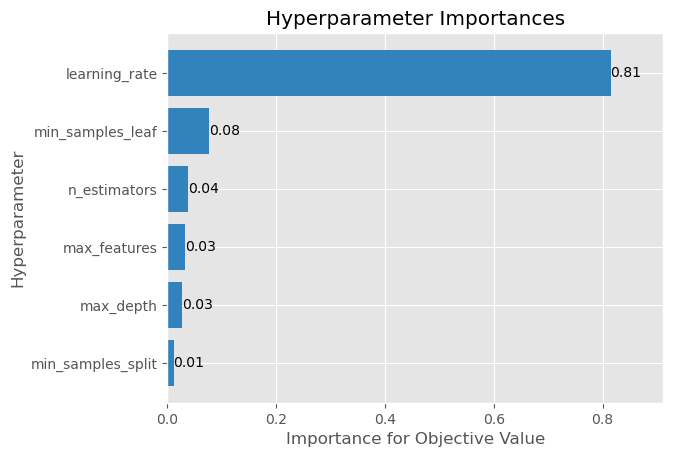

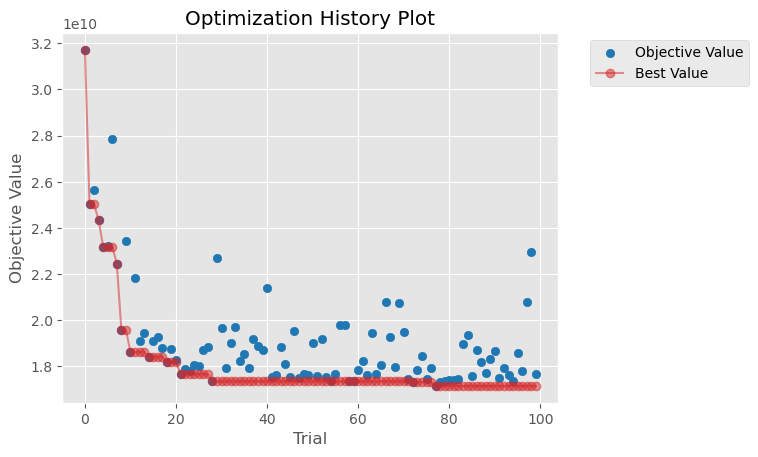

In [25]:
from optuna.visualization.matplotlib import plot_param_importances
from optuna.visualization.matplotlib import plot_optimization_history

# 하이퍼파라미터별 중요도 확인
plot_param_importances(study3)

# 하이퍼파라미터 최적화 과정 확인
import matplotlib.pyplot as plt
import numpy as np
plot_optimization_history(study3)

## XGBoost 를 이용한 가격 예측

In [20]:
import optuna
from xgboost import XGBRegressor

def objectiveXGB(trial):
    # Define the search space for each parameter
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 4000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1),
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0, 0.5),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'random_state': 42,
    }

    # 모델 학습
    model = XGBRegressor(**params)
    model.fit(x_train, y_train)

    # 예측
    y_pred = model.predict(x_test)

    # 모델 평가    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"mse : {mse}")
    print(f"rmse : {rmse}")
    print(f"r2 : {r2}")
    
    return mse

# optimization study 진행
# direction: score 값을 최대 or 최소로 하는 방향으로 지정
study4 = optuna.create_study(direction='minimize')

# n_trials: 시도 횟수 (미입력시 key interrupt가 있을 때까지 무한 반복)
study4.optimize(objectiveXGB, n_trials=100)

# 모든 트라이얼이 완료되었는지 확인
if study4.best_trial is None:
    print("No trials completed.")
else:
    # 최적의 트라이얼 출력
    print('Best trial: score {}, \nparams {}'.format(study4.best_trial.value, study4.best_trial.params))

[I 2023-06-13 14:35:00,789] A new study created in memory with name: no-name-d4d35ba6-e316-409f-bbeb-9e30857192ba
[I 2023-06-13 14:35:04,291] Trial 0 finished with value: 25363542830.260033 and parameters: {'n_estimators': 743, 'learning_rate': 0.5274439485581799, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.2401019843241044, 'subsample': 0.5920306329181821, 'colsample_bytree': 0.9072421063575513}. Best is trial 0 with value: 25363542830.260033.


mse : 25363542830.260033
rmse : 159259.35711995082
r2 : 0.755050555377039


[I 2023-06-13 14:35:16,404] Trial 1 finished with value: 19445916314.703426 and parameters: {'n_estimators': 3853, 'learning_rate': 0.1645107661123313, 'max_depth': 2, 'min_child_weight': 2, 'gamma': 0.4602166123752995, 'subsample': 0.7543434514517074, 'colsample_bytree': 0.9807102409290693}. Best is trial 1 with value: 19445916314.703426.


mse : 19445916314.703426
rmse : 139448.61532013657
r2 : 0.8122002737019706


[I 2023-06-13 14:35:58,211] Trial 2 finished with value: 37238908273.098434 and parameters: {'n_estimators': 3972, 'learning_rate': 0.6156257546103305, 'max_depth': 10, 'min_child_weight': 9, 'gamma': 0.06567235617282347, 'subsample': 0.5615412501986328, 'colsample_bytree': 0.842691503822166}. Best is trial 1 with value: 19445916314.703426.


mse : 37238908273.098434
rmse : 192973.8538587506
r2 : 0.6403637314824077


[I 2023-06-13 14:36:05,937] Trial 3 finished with value: 21351242415.162445 and parameters: {'n_estimators': 3440, 'learning_rate': 0.8356014664672791, 'max_depth': 1, 'min_child_weight': 3, 'gamma': 0.2020401328420387, 'subsample': 0.7991074365336237, 'colsample_bytree': 0.9358472994952367}. Best is trial 1 with value: 19445916314.703426.


mse : 21351242415.162445
rmse : 146120.64335733827
r2 : 0.7937995095320589


[I 2023-06-13 14:36:12,285] Trial 4 finished with value: 22248609908.443333 and parameters: {'n_estimators': 2019, 'learning_rate': 0.7323352474033233, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 0.03851743868273744, 'subsample': 0.8658027560162076, 'colsample_bytree': 0.5932670383660873}. Best is trial 1 with value: 19445916314.703426.


mse : 22248609908.443333
rmse : 149159.67923149787
r2 : 0.7851331465332901


[I 2023-06-13 14:36:19,825] Trial 5 finished with value: 19858248715.803596 and parameters: {'n_estimators': 2512, 'learning_rate': 0.37371787198404155, 'max_depth': 2, 'min_child_weight': 7, 'gamma': 0.001669651788337334, 'subsample': 0.8497095183874184, 'colsample_bytree': 0.6427622045770833}. Best is trial 1 with value: 19445916314.703426.


mse : 19858248715.803596
rmse : 140919.29859250505
r2 : 0.8082181567979771


[I 2023-06-13 14:36:27,387] Trial 6 finished with value: 21443786738.85262 and parameters: {'n_estimators': 2657, 'learning_rate': 0.7049938642290396, 'max_depth': 1, 'min_child_weight': 3, 'gamma': 0.37487050383273596, 'subsample': 0.5579572705165758, 'colsample_bytree': 0.8668430270778831}. Best is trial 1 with value: 19445916314.703426.


mse : 21443786738.85262
rmse : 146436.97189867258
r2 : 0.7929057589687949


[I 2023-06-13 14:36:34,224] Trial 7 finished with value: 20792721402.86379 and parameters: {'n_estimators': 1979, 'learning_rate': 0.4599658052682049, 'max_depth': 3, 'min_child_weight': 1, 'gamma': 0.49813229379745483, 'subsample': 0.8813269108525168, 'colsample_bytree': 0.5813588602958517}. Best is trial 1 with value: 19445916314.703426.


mse : 20792721402.86379
rmse : 144196.81481525098
r2 : 0.7991934488838434


[I 2023-06-13 14:36:45,874] Trial 8 finished with value: 17957956244.517056 and parameters: {'n_estimators': 2333, 'learning_rate': 0.046089338973346626, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.4178280352988356, 'subsample': 0.939427703556173, 'colsample_bytree': 0.7340439425311005}. Best is trial 8 with value: 17957956244.517056.


mse : 17957956244.517056
rmse : 134007.2992210389
r2 : 0.8265703084897943


[I 2023-06-13 14:37:10,712] Trial 9 finished with value: 40176580196.164955 and parameters: {'n_estimators': 2319, 'learning_rate': 0.9660390551066411, 'max_depth': 8, 'min_child_weight': 6, 'gamma': 0.2877848220106228, 'subsample': 0.815711960796397, 'colsample_bytree': 0.9557269480371284}. Best is trial 8 with value: 17957956244.517056.


mse : 40176580196.164955
rmse : 200440.96436648112
r2 : 0.6119930456182423


[I 2023-06-13 14:37:16,707] Trial 10 finished with value: 17217243746.348423 and parameters: {'n_estimators': 933, 'learning_rate': 0.02472046991368088, 'max_depth': 6, 'min_child_weight': 4, 'gamma': 0.39666902277123567, 'subsample': 0.9733246853315191, 'colsample_bytree': 0.7168315355241667}. Best is trial 10 with value: 17217243746.348423.


mse : 17217243746.348423
rmse : 131214.4951838341
r2 : 0.8337237695131978


[I 2023-06-13 14:37:19,835] Trial 11 finished with value: 17281913193.370934 and parameters: {'n_estimators': 487, 'learning_rate': 0.02843682523112318, 'max_depth': 6, 'min_child_weight': 4, 'gamma': 0.3899998532217921, 'subsample': 0.9939799321968568, 'colsample_bytree': 0.7311820485955249}. Best is trial 10 with value: 17217243746.348423.


mse : 17281913193.370934
rmse : 131460.69067736916
r2 : 0.8330992217030497


[I 2023-06-13 14:37:21,154] Trial 12 finished with value: 20036990978.008904 and parameters: {'n_estimators': 135, 'learning_rate': 0.021817269745115275, 'max_depth': 7, 'min_child_weight': 5, 'gamma': 0.35908801827216424, 'subsample': 0.9964180248281987, 'colsample_bytree': 0.7369760555803511}. Best is trial 10 with value: 17217243746.348423.


mse : 20036990978.008904
rmse : 141552.07867780997
r2 : 0.8064919461439353


[I 2023-06-13 14:37:28,286] Trial 13 finished with value: 20573102697.857433 and parameters: {'n_estimators': 1113, 'learning_rate': 0.24060405299534837, 'max_depth': 7, 'min_child_weight': 8, 'gamma': 0.3437961946491002, 'subsample': 0.9977455824063665, 'colsample_bytree': 0.6770322787257874}. Best is trial 10 with value: 17217243746.348423.


mse : 20573102697.857433
rmse : 143433.26914582067
r2 : 0.8013144254437875


[I 2023-06-13 14:37:35,728] Trial 14 finished with value: 20009797548.286488 and parameters: {'n_estimators': 1174, 'learning_rate': 0.20903032646197867, 'max_depth': 6, 'min_child_weight': 4, 'gamma': 0.4442740505991425, 'subsample': 0.9421974908441548, 'colsample_bytree': 0.5067674195738002}. Best is trial 10 with value: 17217243746.348423.


mse : 20009797548.286488
rmse : 141455.99156022514
r2 : 0.8067545677955112


[I 2023-06-13 14:37:37,865] Trial 15 finished with value: 17261075241.39536 and parameters: {'n_estimators': 145, 'learning_rate': 0.026236587972761464, 'max_depth': 9, 'min_child_weight': 5, 'gamma': 0.3051248876942802, 'subsample': 0.9104488735626676, 'colsample_bytree': 0.7961280986115067}. Best is trial 10 with value: 17217243746.348423.


mse : 17261075241.39536
rmse : 131381.41132365476
r2 : 0.8333004650702581


[I 2023-06-13 14:37:52,801] Trial 16 finished with value: 23552288551.987446 and parameters: {'n_estimators': 1432, 'learning_rate': 0.3168285292979506, 'max_depth': 10, 'min_child_weight': 10, 'gamma': 0.29876808441391073, 'subsample': 0.9120893599793168, 'colsample_bytree': 0.8102016590973642}. Best is trial 10 with value: 17217243746.348423.


mse : 23552288551.987446
rmse : 153467.5488563867
r2 : 0.7725428171049438


[I 2023-06-13 14:37:53,869] Trial 17 finished with value: 17057306597.829857 and parameters: {'n_estimators': 103, 'learning_rate': 0.14953766521420658, 'max_depth': 9, 'min_child_weight': 5, 'gamma': 0.33092230108837994, 'subsample': 0.9223377048622352, 'colsample_bytree': 0.7957818354681262}. Best is trial 17 with value: 17057306597.829857.


mse : 17057306597.829857
rmse : 130603.62398429019
r2 : 0.8352683690183373


[I 2023-06-13 14:37:59,322] Trial 18 finished with value: 19596772053.509308 and parameters: {'n_estimators': 661, 'learning_rate': 0.13555343948846962, 'max_depth': 8, 'min_child_weight': 7, 'gamma': 0.42163766494130933, 'subsample': 0.7076148975923482, 'colsample_bytree': 0.7799757372141515}. Best is trial 17 with value: 17057306597.829857.


mse : 19596772053.509308
rmse : 139988.47114498145
r2 : 0.8107433782798293


[I 2023-06-13 14:38:06,546] Trial 19 finished with value: 21187789507.65451 and parameters: {'n_estimators': 1552, 'learning_rate': 0.31190891768751977, 'max_depth': 5, 'min_child_weight': 5, 'gamma': 0.19840181190336673, 'subsample': 0.945658993762177, 'colsample_bytree': 0.8746011405324072}. Best is trial 17 with value: 17057306597.829857.


mse : 21187789507.65451
rmse : 145560.26074328978
r2 : 0.7953780626223752


[I 2023-06-13 14:38:15,383] Trial 20 finished with value: 21668716297.616013 and parameters: {'n_estimators': 1016, 'learning_rate': 0.17898098875751134, 'max_depth': 9, 'min_child_weight': 7, 'gamma': 0.33547333168648275, 'subsample': 0.8279415288998652, 'colsample_bytree': 0.7024079276943089}. Best is trial 17 with value: 17057306597.829857.


mse : 21668716297.616013
rmse : 147202.97652430815
r2 : 0.7907334926230757


[I 2023-06-13 14:38:17,277] Trial 21 finished with value: 17110591025.719786 and parameters: {'n_estimators': 186, 'learning_rate': 0.0943810314033053, 'max_depth': 9, 'min_child_weight': 5, 'gamma': 0.30950905197419, 'subsample': 0.8973800517278948, 'colsample_bytree': 0.7903685501704889}. Best is trial 17 with value: 17057306597.829857.


mse : 17110591025.719786
rmse : 130807.45783677544
r2 : 0.8347537724926848


[I 2023-06-13 14:38:21,151] Trial 22 finished with value: 18593827712.511368 and parameters: {'n_estimators': 411, 'learning_rate': 0.11004157194072917, 'max_depth': 9, 'min_child_weight': 3, 'gamma': 0.3890059982689865, 'subsample': 0.8847185075541657, 'colsample_bytree': 0.7774873953425774}. Best is trial 17 with value: 17057306597.829857.


mse : 18593827712.511368
rmse : 136359.18638841817
r2 : 0.8204293539717619


[I 2023-06-13 14:38:22,457] Trial 23 finished with value: 17384258610.251217 and parameters: {'n_estimators': 148, 'learning_rate': 0.11075024140495557, 'max_depth': 8, 'min_child_weight': 6, 'gamma': 0.3293159361754081, 'subsample': 0.9553447561709616, 'colsample_bytree': 0.8257022034130376}. Best is trial 17 with value: 17057306597.829857.


mse : 17384258610.251217
rmse : 131849.37849778138
r2 : 0.8321108166843856


[I 2023-06-13 14:38:27,945] Trial 24 finished with value: 20634640839.66241 and parameters: {'n_estimators': 827, 'learning_rate': 0.23224947595322204, 'max_depth': 7, 'min_child_weight': 4, 'gamma': 0.2682046085866757, 'subsample': 0.9019290694767292, 'colsample_bytree': 0.77422648311604}. Best is trial 17 with value: 17057306597.829857.


mse : 20634640839.66241
rmse : 143647.62733739257
r2 : 0.8007201183409062


[I 2023-06-13 14:38:32,077] Trial 25 finished with value: 18855415984.975536 and parameters: {'n_estimators': 397, 'learning_rate': 0.12036163417573836, 'max_depth': 10, 'min_child_weight': 5, 'gamma': 0.37708211400506103, 'subsample': 0.8545222559623491, 'colsample_bytree': 0.826759466801846}. Best is trial 17 with value: 17057306597.829857.


mse : 18855415984.975536
rmse : 137315.02461484517
r2 : 0.8179030546101628


[I 2023-06-13 14:38:45,707] Trial 26 finished with value: 21501873884.72293 and parameters: {'n_estimators': 1563, 'learning_rate': 0.2755067331034895, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.31776858025108884, 'subsample': 0.9448112503579664, 'colsample_bytree': 0.7614643813900913}. Best is trial 17 with value: 17057306597.829857.


mse : 21501873884.72293
rmse : 146635.17274079547
r2 : 0.7923447799992602


[I 2023-06-13 14:38:49,314] Trial 27 finished with value: 17594391993.09771 and parameters: {'n_estimators': 517, 'learning_rate': 0.07626986558249509, 'max_depth': 8, 'min_child_weight': 8, 'gamma': 0.24930227853409814, 'subsample': 0.9716943782013578, 'colsample_bytree': 0.703469713422117}. Best is trial 17 with value: 17057306597.829857.


mse : 17594391993.09771
rmse : 132643.85395900448
r2 : 0.8300814450082968


[I 2023-06-13 14:38:54,537] Trial 28 finished with value: 18940112608.13679 and parameters: {'n_estimators': 893, 'learning_rate': 0.15752749090531443, 'max_depth': 6, 'min_child_weight': 6, 'gamma': 0.3470018357985287, 'subsample': 0.9181162982437934, 'colsample_bytree': 0.8561803766854734}. Best is trial 17 with value: 17057306597.829857.


mse : 18940112608.13679
rmse : 137623.0816692345
r2 : 0.8170850935333671


[I 2023-06-13 14:38:57,467] Trial 29 finished with value: 19656166129.339184 and parameters: {'n_estimators': 707, 'learning_rate': 0.3740550078115117, 'max_depth': 4, 'min_child_weight': 1, 'gamma': 0.2301198937394729, 'subsample': 0.9719950504766269, 'colsample_bytree': 0.9185954854025112}. Best is trial 17 with value: 17057306597.829857.


mse : 19656166129.339184
rmse : 140200.449818605
r2 : 0.8101697775811499


[I 2023-06-13 14:39:07,138] Trial 30 finished with value: 19266309968.866272 and parameters: {'n_estimators': 1297, 'learning_rate': 0.07318110937098452, 'max_depth': 7, 'min_child_weight': 3, 'gamma': 0.28118331919741407, 'subsample': 0.6653354147902784, 'colsample_bytree': 0.8054169281114878}. Best is trial 17 with value: 17057306597.829857.


mse : 19266309968.866272
rmse : 138803.133858232
r2 : 0.813934829278768


[I 2023-06-13 14:39:08,415] Trial 31 finished with value: 25654799479.536865 and parameters: {'n_estimators': 118, 'learning_rate': 0.019130226502434955, 'max_depth': 9, 'min_child_weight': 5, 'gamma': 0.3115535786585683, 'subsample': 0.9096678441304131, 'colsample_bytree': 0.7941089210337717}. Best is trial 17 with value: 17057306597.829857.


mse : 25654799479.536865
rmse : 160171.1568277412
r2 : 0.752237732461859


[I 2023-06-13 14:39:11,875] Trial 32 finished with value: 19396816184.92688 and parameters: {'n_estimators': 286, 'learning_rate': 0.01011679005181347, 'max_depth': 10, 'min_child_weight': 4, 'gamma': 0.31194840215612407, 'subsample': 0.89908502521628, 'colsample_bytree': 0.9007065923473372}. Best is trial 17 with value: 17057306597.829857.


mse : 19396816184.92688
rmse : 139272.45307284166
r2 : 0.8126744601987139


[I 2023-06-13 14:39:17,882] Trial 33 finished with value: 21745793743.175133 and parameters: {'n_estimators': 606, 'learning_rate': 0.1770520977721395, 'max_depth': 9, 'min_child_weight': 5, 'gamma': 0.40520049704895356, 'subsample': 0.5001422474494347, 'colsample_bytree': 0.7513685850639076}. Best is trial 17 with value: 17057306597.829857.


mse : 21745793743.175133
rmse : 147464.55080179486
r2 : 0.7899891140633053


[I 2023-06-13 14:39:20,367] Trial 34 finished with value: 17296035227.73101 and parameters: {'n_estimators': 291, 'learning_rate': 0.08700683747046231, 'max_depth': 8, 'min_child_weight': 2, 'gamma': 0.34437663926888756, 'subsample': 0.9230933924631797, 'colsample_bytree': 0.8356772736490269}. Best is trial 17 with value: 17057306597.829857.


mse : 17296035227.73101
rmse : 131514.39171334446
r2 : 0.8329628375828738


[I 2023-06-13 14:39:52,394] Trial 35 finished with value: 22285861662.53173 and parameters: {'n_estimators': 3089, 'learning_rate': 0.17229631215077454, 'max_depth': 10, 'min_child_weight': 6, 'gamma': 0.2654782402959905, 'subsample': 0.7748956924191823, 'colsample_bytree': 0.7945325149705709}. Best is trial 17 with value: 17057306597.829857.


mse : 22285861662.53173
rmse : 149284.49906983555
r2 : 0.7847733862057897


[I 2023-06-13 14:40:01,353] Trial 36 finished with value: 19375806888.513073 and parameters: {'n_estimators': 897, 'learning_rate': 0.08307955524012454, 'max_depth': 9, 'min_child_weight': 3, 'gamma': 0.4396331856602627, 'subsample': 0.8681476934753812, 'colsample_bytree': 0.8904440184717264}. Best is trial 17 with value: 17057306597.829857.


mse : 19375806888.513073
rmse : 139197.00746967614
r2 : 0.812877358331791


[I 2023-06-13 14:40:22,385] Trial 37 finished with value: 20732739021.993607 and parameters: {'n_estimators': 1828, 'learning_rate': 0.12148828304762294, 'max_depth': 10, 'min_child_weight': 4, 'gamma': 0.37000900946364634, 'subsample': 0.843773787633568, 'colsample_bytree': 0.8484346973598299}. Best is trial 17 with value: 17057306597.829857.


mse : 20732739021.993607
rmse : 143988.67671450283
r2 : 0.7997727311623342


[I 2023-06-13 14:40:23,112] Trial 38 finished with value: 17946412425.617126 and parameters: {'n_estimators': 107, 'learning_rate': 0.21133266856483973, 'max_depth': 5, 'min_child_weight': 5, 'gamma': 0.48063680223400135, 'subsample': 0.879677263468544, 'colsample_bytree': 0.8118664221127845}. Best is trial 17 with value: 17057306597.829857.


mse : 17946412425.617126
rmse : 133964.22069200838
r2 : 0.8266817933894902


[I 2023-06-13 14:40:37,382] Trial 39 finished with value: 18849079858.946945 and parameters: {'n_estimators': 3692, 'learning_rate': 0.06699257910484913, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 0.2137815184250473, 'subsample': 0.8112835118027146, 'colsample_bytree': 0.7578268021375878}. Best is trial 17 with value: 17057306597.829857.


mse : 18849079858.946945
rmse : 137291.95118049326
r2 : 0.8179642460045256


[I 2023-06-13 14:40:42,935] Trial 40 finished with value: 19745051719.02943 and parameters: {'n_estimators': 671, 'learning_rate': 0.1534393129986043, 'max_depth': 8, 'min_child_weight': 6, 'gamma': 0.28886687402843125, 'subsample': 0.8408213927845896, 'colsample_bytree': 0.8790767147326755}. Best is trial 17 with value: 17057306597.829857.


mse : 19745051719.02943
rmse : 140517.0869290615
r2 : 0.809311361390032


[I 2023-06-13 14:40:45,700] Trial 41 finished with value: 17280562747.4668 and parameters: {'n_estimators': 479, 'learning_rate': 0.015297873647376845, 'max_depth': 6, 'min_child_weight': 4, 'gamma': 0.39319660872761886, 'subsample': 0.9776911459403114, 'colsample_bytree': 0.7296985425552337}. Best is trial 17 with value: 17057306597.829857.


mse : 17280562747.4668
rmse : 131455.5542663253
r2 : 0.8331122636891959


[I 2023-06-13 14:40:47,967] Trial 42 finished with value: 17253599774.228085 and parameters: {'n_estimators': 281, 'learning_rate': 0.05954145950162099, 'max_depth': 6, 'min_child_weight': 4, 'gamma': 0.40450093374352253, 'subsample': 0.9751690581473389, 'colsample_bytree': 0.7087666651390732}. Best is trial 17 with value: 17057306597.829857.


mse : 17253599774.228085
rmse : 131352.95875703785
r2 : 0.8333726596979241


[I 2023-06-13 14:40:50,598] Trial 43 finished with value: 16993757398.926565 and parameters: {'n_estimators': 306, 'learning_rate': 0.060558211840679825, 'max_depth': 7, 'min_child_weight': 3, 'gamma': 0.35942389253368945, 'subsample': 0.9611256596105859, 'colsample_bytree': 0.7053646688368442}. Best is trial 43 with value: 16993757398.926565.


mse : 16993757398.926565
rmse : 130360.10662363913
r2 : 0.8358820979867929


[I 2023-06-13 14:40:53,486] Trial 44 finished with value: 16977992284.7996 and parameters: {'n_estimators': 359, 'learning_rate': 0.06738909666727584, 'max_depth': 7, 'min_child_weight': 3, 'gamma': 0.42359659677139844, 'subsample': 0.9599907356622825, 'colsample_bytree': 0.6718429867935366}. Best is trial 44 with value: 16977992284.7996.


mse : 16977992284.7996
rmse : 130299.62503706448
r2 : 0.8360343502165253


[I 2023-06-13 14:40:56,044] Trial 45 finished with value: 17762412070.080326 and parameters: {'n_estimators': 353, 'learning_rate': 0.12626704959172605, 'max_depth': 7, 'min_child_weight': 2, 'gamma': 0.3599591278399921, 'subsample': 0.9361890931422046, 'colsample_bytree': 0.6503226002699313}. Best is trial 44 with value: 16977992284.7996.


mse : 17762412070.080326
rmse : 133275.69947323602
r2 : 0.8284587842933554


[I 2023-06-13 14:41:01,447] Trial 46 finished with value: 17605788195.700584 and parameters: {'n_estimators': 813, 'learning_rate': 0.059066329915412163, 'max_depth': 7, 'min_child_weight': 3, 'gamma': 0.453067168337371, 'subsample': 0.9578376021184518, 'colsample_bytree': 0.667940268871716}. Best is trial 44 with value: 16977992284.7996.


mse : 17605788195.700584
rmse : 132686.80490425785
r2 : 0.8299713857189828


[I 2023-06-13 14:41:05,891] Trial 47 finished with value: 19582697173.9228 and parameters: {'n_estimators': 1026, 'learning_rate': 0.18755244434717996, 'max_depth': 5, 'min_child_weight': 3, 'gamma': 0.4172044524279945, 'subsample': 0.9965672503752168, 'colsample_bytree': 0.6852224067299287}. Best is trial 44 with value: 16977992284.7996.


mse : 19582697173.9228
rmse : 139938.190548266
r2 : 0.8108793070008651


[I 2023-06-13 14:41:09,499] Trial 48 finished with value: 20139259153.5581 and parameters: {'n_estimators': 533, 'learning_rate': 0.24068893128387445, 'max_depth': 7, 'min_child_weight': 2, 'gamma': 0.4299332411191693, 'subsample': 0.9291753162624762, 'colsample_bytree': 0.6258927401725142}. Best is trial 44 with value: 16977992284.7996.


mse : 20139259153.5581
rmse : 141912.85760479246
r2 : 0.8055042870865621


[I 2023-06-13 14:41:26,333] Trial 49 finished with value: 26512962415.82552 and parameters: {'n_estimators': 2883, 'learning_rate': 0.5669891033443996, 'max_depth': 6, 'min_child_weight': 2, 'gamma': 0.4655104136921631, 'subsample': 0.8909885699489958, 'colsample_bytree': 0.7233825699625758}. Best is trial 44 with value: 16977992284.7996.


mse : 26512962415.82552
rmse : 162828.01483720643
r2 : 0.7439499890639166


[I 2023-06-13 14:41:28,515] Trial 50 finished with value: 17657688420.43934 and parameters: {'n_estimators': 261, 'learning_rate': 0.13648085069794075, 'max_depth': 8, 'min_child_weight': 3, 'gamma': 0.36825203732931017, 'subsample': 0.9501896461446386, 'colsample_bytree': 0.742546924374693}. Best is trial 44 with value: 16977992284.7996.


mse : 17657688420.43934
rmse : 132882.2351574481
r2 : 0.8294701571914603


[I 2023-06-13 14:41:30,230] Trial 51 finished with value: 17259663478.593864 and parameters: {'n_estimators': 294, 'learning_rate': 0.054529378214431996, 'max_depth': 6, 'min_child_weight': 4, 'gamma': 0.4034984833374504, 'subsample': 0.9663684724423056, 'colsample_bytree': 0.7085834465570974}. Best is trial 44 with value: 16977992284.7996.


mse : 17259663478.593864
rmse : 131376.03844915505
r2 : 0.83331409922683


[I 2023-06-13 14:41:33,146] Trial 52 finished with value: 17492003850.46635 and parameters: {'n_estimators': 544, 'learning_rate': 0.0798904131339432, 'max_depth': 6, 'min_child_weight': 4, 'gamma': 0.41105473287392047, 'subsample': 0.9838294702205003, 'colsample_bytree': 0.7173379087625875}. Best is trial 44 with value: 16977992284.7996.


mse : 17492003850.46635
rmse : 132257.3394956452
r2 : 0.8310702626526366


[I 2023-06-13 14:41:34,421] Trial 53 finished with value: 17668762302.579147 and parameters: {'n_estimators': 251, 'learning_rate': 0.043949701119671135, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.3867401621623001, 'subsample': 0.9992125067232355, 'colsample_bytree': 0.7454529472025146}. Best is trial 44 with value: 16977992284.7996.


mse : 17668762302.579147
rmse : 132923.89665736989
r2 : 0.8293632107251043


[I 2023-06-13 14:41:36,808] Trial 54 finished with value: 18123798917.66883 and parameters: {'n_estimators': 744, 'learning_rate': 0.0971388813455563, 'max_depth': 3, 'min_child_weight': 3, 'gamma': 0.4356573724464, 'subsample': 0.9293740722370979, 'colsample_bytree': 0.6946541476546482}. Best is trial 44 with value: 16977992284.7996.


mse : 18123798917.66883
rmse : 134624.65939666785
r2 : 0.82496867614075


[I 2023-06-13 14:41:39,495] Trial 55 finished with value: 17156579487.589106 and parameters: {'n_estimators': 428, 'learning_rate': 0.04187766059091808, 'max_depth': 7, 'min_child_weight': 4, 'gamma': 0.3601640154018922, 'subsample': 0.9687724608965215, 'colsample_bytree': 0.6632794890843147}. Best is trial 44 with value: 16977992284.7996.


mse : 17156579487.589106
rmse : 130983.12672855656
r2 : 0.8343096370550868


[I 2023-06-13 14:41:42,169] Trial 56 finished with value: 18388208245.7121 and parameters: {'n_estimators': 445, 'learning_rate': 0.14135841443707015, 'max_depth': 7, 'min_child_weight': 5, 'gamma': 0.32972853484061, 'subsample': 0.9534564426622734, 'colsample_bytree': 0.671852285107561}. Best is trial 44 with value: 16977992284.7996.


mse : 18388208245.7121
rmse : 135603.1277136044
r2 : 0.822415132320363


[I 2023-06-13 14:41:52,260] Trial 57 finished with value: 17787830463.896824 and parameters: {'n_estimators': 1222, 'learning_rate': 0.04435147080714037, 'max_depth': 8, 'min_child_weight': 5, 'gamma': 0.352592454222149, 'subsample': 0.9321735695745873, 'colsample_bytree': 0.6525121074323852}. Best is trial 44 with value: 16977992284.7996.


mse : 17787830463.896824
rmse : 133371.02557863467
r2 : 0.828213305123106


[I 2023-06-13 14:41:58,572] Trial 58 finished with value: 18693553035.371674 and parameters: {'n_estimators': 1012, 'learning_rate': 0.10532425427950384, 'max_depth': 7, 'min_child_weight': 4, 'gamma': 0.37510463146093287, 'subsample': 0.9682124048549, 'colsample_bytree': 0.6858550583443891}. Best is trial 44 with value: 16977992284.7996.


mse : 18693553035.371674
rmse : 136724.36884246962
r2 : 0.8194662526174694


[I 2023-06-13 14:42:03,524] Trial 59 finished with value: 20246780691.040966 and parameters: {'n_estimators': 621, 'learning_rate': 0.20622220282311998, 'max_depth': 8, 'min_child_weight': 4, 'gamma': 0.32773418711029323, 'subsample': 0.9051673028163287, 'colsample_bytree': 0.633472958163395}. Best is trial 44 with value: 16977992284.7996.


mse : 20246780691.040966
rmse : 142291.1827593016
r2 : 0.8044658934730322


[I 2023-06-13 14:42:07,137] Trial 60 finished with value: 18946383506.851784 and parameters: {'n_estimators': 416, 'learning_rate': 0.14654915003504004, 'max_depth': 9, 'min_child_weight': 3, 'gamma': 0.34819199379150245, 'subsample': 0.958920637934305, 'colsample_bytree': 0.6106834289777442}. Best is trial 44 with value: 16977992284.7996.


mse : 18946383506.851784
rmse : 137645.862657952
r2 : 0.8170245320744336


[I 2023-06-13 14:42:08,365] Trial 61 finished with value: 17347250320.15348 and parameters: {'n_estimators': 203, 'learning_rate': 0.043758476674157346, 'max_depth': 6, 'min_child_weight': 4, 'gamma': 0.39374993917108086, 'subsample': 0.9822475729361014, 'colsample_bytree': 0.7149101812686574}. Best is trial 44 with value: 16977992284.7996.


mse : 17347250320.15348
rmse : 131708.96066765345
r2 : 0.8324682257485118


[I 2023-06-13 14:42:10,641] Trial 62 finished with value: 17350982115.62272 and parameters: {'n_estimators': 359, 'learning_rate': 0.016518743194352335, 'max_depth': 6, 'min_child_weight': 5, 'gamma': 0.4224696029830958, 'subsample': 0.9804457450170858, 'colsample_bytree': 0.7688275002727444}. Best is trial 44 with value: 16977992284.7996.


mse : 17350982115.62272
rmse : 131723.1267303609
r2 : 0.8324321857822596


[I 2023-06-13 14:42:11,581] Trial 63 finished with value: 17349489762.396004 and parameters: {'n_estimators': 118, 'learning_rate': 0.09317672688511477, 'max_depth': 7, 'min_child_weight': 3, 'gamma': 0.3626358486735994, 'subsample': 0.9440190310460232, 'colsample_bytree': 0.7015861166403002}. Best is trial 44 with value: 16977992284.7996.


mse : 17349489762.396004
rmse : 131717.4618734965
r2 : 0.8324465982441349


[I 2023-06-13 14:42:15,832] Trial 64 finished with value: 17508090866.15864 and parameters: {'n_estimators': 719, 'learning_rate': 0.05393510181606903, 'max_depth': 7, 'min_child_weight': 4, 'gamma': 0.3821336470939696, 'subsample': 0.9617855378291766, 'colsample_bytree': 0.6676373945221303}. Best is trial 44 with value: 16977992284.7996.


mse : 17508090866.15864
rmse : 132318.1426190628
r2 : 0.8309149016454682


[I 2023-06-13 14:42:18,425] Trial 65 finished with value: 17589876924.796272 and parameters: {'n_estimators': 487, 'learning_rate': 0.10313700338700128, 'max_depth': 5, 'min_child_weight': 5, 'gamma': 0.40056407279943174, 'subsample': 0.915577379273284, 'colsample_bytree': 0.7340817988010827}. Best is trial 44 with value: 16977992284.7996.


mse : 17589876924.796272
rmse : 132626.83335131043
r2 : 0.8301250494637262


[I 2023-06-13 14:42:19,867] Trial 66 finished with value: 20871768997.845284 and parameters: {'n_estimators': 230, 'learning_rate': 0.01264913838889059, 'max_depth': 6, 'min_child_weight': 4, 'gamma': 0.33083223669420947, 'subsample': 0.9849889780913965, 'colsample_bytree': 0.6873904509495797}. Best is trial 44 with value: 16977992284.7996.


mse : 20871768997.845284
rmse : 144470.65099128365
r2 : 0.7984300435260399


[I 2023-06-13 14:42:21,744] Trial 67 finished with value: 23704102811.695347 and parameters: {'n_estimators': 912, 'learning_rate': 0.06719341847470926, 'max_depth': 1, 'min_child_weight': 6, 'gamma': 0.3064158237913178, 'subsample': 0.940170771356227, 'colsample_bytree': 0.7833625141088053}. Best is trial 44 with value: 16977992284.7996.


mse : 23704102811.695347
rmse : 153961.36791966791
r2 : 0.7710766647282762


[I 2023-06-13 14:42:26,392] Trial 68 finished with value: 19308199407.99415 and parameters: {'n_estimators': 581, 'learning_rate': 0.15637791432864262, 'max_depth': 8, 'min_child_weight': 3, 'gamma': 0.35811023234989453, 'subsample': 0.9190638842383118, 'colsample_bytree': 0.7642813067171919}. Best is trial 44 with value: 16977992284.7996.


mse : 19308199407.99415
rmse : 138953.94707597964
r2 : 0.8135302803197126


[I 2023-06-13 14:42:40,197] Trial 69 finished with value: 20675991977.66226 and parameters: {'n_estimators': 2285, 'learning_rate': 0.11128801987677439, 'max_depth': 7, 'min_child_weight': 10, 'gamma': 0.41402282559203085, 'subsample': 0.894721540712775, 'colsample_bytree': 0.7225716175944591}. Best is trial 44 with value: 16977992284.7996.


mse : 20675991977.66226
rmse : 143791.48784841978
r2 : 0.8003207680468492


[I 2023-06-13 14:42:42,067] Trial 70 finished with value: 17530523305.174072 and parameters: {'n_estimators': 352, 'learning_rate': 0.04285196031741435, 'max_depth': 5, 'min_child_weight': 5, 'gamma': 0.3797396221101219, 'subsample': 0.9993702820934268, 'colsample_bytree': 0.7443702845649554}. Best is trial 44 with value: 16977992284.7996.


mse : 17530523305.174072
rmse : 132402.88254103108
r2 : 0.8306982594549375


[I 2023-06-13 14:42:43,527] Trial 71 finished with value: 17265527299.022713 and parameters: {'n_estimators': 252, 'learning_rate': 0.06509830794240974, 'max_depth': 6, 'min_child_weight': 4, 'gamma': 0.3996365594853253, 'subsample': 0.9652391975589223, 'colsample_bytree': 0.6601611177172377}. Best is trial 44 with value: 16977992284.7996.


mse : 17265527299.022713
rmse : 131398.35348672644
r2 : 0.8332574691429719


[I 2023-06-13 14:42:45,753] Trial 72 finished with value: 17310223332.380898 and parameters: {'n_estimators': 366, 'learning_rate': 0.04309355536195118, 'max_depth': 6, 'min_child_weight': 4, 'gamma': 0.4311097098085975, 'subsample': 0.9696867104948161, 'colsample_bytree': 0.7093587705511091}. Best is trial 44 with value: 16977992284.7996.


mse : 17310223332.380898
rmse : 131568.3219182372
r2 : 0.8328258153861918


[I 2023-06-13 14:42:46,601] Trial 73 finished with value: 17514363284.80866 and parameters: {'n_estimators': 120, 'learning_rate': 0.0843181002004133, 'max_depth': 6, 'min_child_weight': 4, 'gamma': 0.4043388088205124, 'subsample': 0.9471140686067222, 'colsample_bytree': 0.678023844778513}. Best is trial 44 with value: 16977992284.7996.


mse : 17514363284.80866
rmse : 132341.84253216613
r2 : 0.8308543255077004


[I 2023-06-13 14:42:48,584] Trial 74 finished with value: 17628429759.01632 and parameters: {'n_estimators': 284, 'learning_rate': 0.11886417265413184, 'max_depth': 7, 'min_child_weight': 5, 'gamma': 0.34424965046148537, 'subsample': 0.9804355122600938, 'colsample_bytree': 0.6986291740230647}. Best is trial 44 with value: 16977992284.7996.


mse : 17628429759.01632
rmse : 132772.0970649192
r2 : 0.8297527239020316


[I 2023-06-13 14:42:50,981] Trial 75 finished with value: 18274046636.99346 and parameters: {'n_estimators': 614, 'learning_rate': 0.17657335461586043, 'max_depth': 4, 'min_child_weight': 3, 'gamma': 0.36981656618770414, 'subsample': 0.9308679693509179, 'colsample_bytree': 0.7136842552946111}. Best is trial 44 with value: 16977992284.7996.


mse : 18274046636.99346
rmse : 135181.53215951307
r2 : 0.8235176526914341


[I 2023-06-13 14:42:57,828] Trial 76 finished with value: 16711060805.043175 and parameters: {'n_estimators': 780, 'learning_rate': 0.010864231870448528, 'max_depth': 9, 'min_child_weight': 4, 'gamma': 0.3210430037983453, 'subsample': 0.9597364961771607, 'colsample_bytree': 0.7528356124545474}. Best is trial 76 with value: 16711060805.043175.


mse : 16711060805.043175
rmse : 129271.26828898668
r2 : 0.8386122518194793


[I 2023-06-13 14:43:11,681] Trial 77 finished with value: 17184455160.5367 and parameters: {'n_estimators': 1670, 'learning_rate': 0.013849170754569436, 'max_depth': 9, 'min_child_weight': 3, 'gamma': 0.32475420869473226, 'subsample': 0.9162030877947362, 'colsample_bytree': 0.7571589210776553}. Best is trial 76 with value: 16711060805.043175.


mse : 17184455160.5367
rmse : 131089.49294484552
r2 : 0.8340404266118652


[I 2023-06-13 14:43:26,851] Trial 78 finished with value: 16940899049.32323 and parameters: {'n_estimators': 1723, 'learning_rate': 0.011070440592562006, 'max_depth': 9, 'min_child_weight': 3, 'gamma': 0.2942277956800069, 'subsample': 0.8814660952226898, 'colsample_bytree': 0.7614248767698011}. Best is trial 76 with value: 16711060805.043175.


mse : 16940899049.32323
rmse : 130157.20897946156
r2 : 0.8363925796440942


[I 2023-06-13 14:43:44,744] Trial 79 finished with value: 16894720046.823385 and parameters: {'n_estimators': 1748, 'learning_rate': 0.011583021067618937, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.29952925311753126, 'subsample': 0.8731982795761335, 'colsample_bytree': 0.756111683761093}. Best is trial 76 with value: 16711060805.043175.


mse : 16894720046.823385
rmse : 129979.69090139962
r2 : 0.8368385552355673


[I 2023-06-13 14:44:06,312] Trial 80 finished with value: 19757363462.924114 and parameters: {'n_estimators': 2104, 'learning_rate': 0.08721092601914077, 'max_depth': 10, 'min_child_weight': 2, 'gamma': 0.2892033077531975, 'subsample': 0.8731552406705179, 'colsample_bytree': 0.7866148866990901}. Best is trial 76 with value: 16711060805.043175.


mse : 19757363462.924114
rmse : 140560.88880952666
r2 : 0.8091924602235221


[I 2023-06-13 14:44:22,188] Trial 81 finished with value: 18441808098.826164 and parameters: {'n_estimators': 1718, 'learning_rate': 0.030147908686498026, 'max_depth': 9, 'min_child_weight': 1, 'gamma': 0.3114988013426374, 'subsample': 0.8624813661593467, 'colsample_bytree': 0.7559106324210786}. Best is trial 76 with value: 16711060805.043175.


mse : 18441808098.826164
rmse : 135800.61891915722
r2 : 0.8218974895628025


[I 2023-06-13 14:44:38,711] Trial 82 finished with value: 17262052208.687305 and parameters: {'n_estimators': 1876, 'learning_rate': 0.014687809217856382, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.31990604211277573, 'subsample': 0.8844597101643905, 'colsample_bytree': 0.771208529140315}. Best is trial 76 with value: 16711060805.043175.


mse : 17262052208.687305
rmse : 131385.12932857854
r2 : 0.833291029968972


[I 2023-06-13 14:44:51,654] Trial 83 finished with value: 16708693617.903322 and parameters: {'n_estimators': 1453, 'learning_rate': 0.010095903774984705, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.2707027138659627, 'subsample': 0.9027982928929229, 'colsample_bytree': 0.8053354159038038}. Best is trial 83 with value: 16708693617.903322.


mse : 16708693617.903322
rmse : 129262.11207427846
r2 : 0.8386351130253883


[I 2023-06-13 14:45:06,192] Trial 84 finished with value: 18674552380.433086 and parameters: {'n_estimators': 1366, 'learning_rate': 0.039007440192982246, 'max_depth': 10, 'min_child_weight': 2, 'gamma': 0.27205239381821356, 'subsample': 0.8974536224040701, 'colsample_bytree': 0.8207361069251231}. Best is trial 83 with value: 16708693617.903322.


mse : 18674552380.433086
rmse : 136654.86592299992
r2 : 0.8196497522139503


[I 2023-06-13 14:45:20,346] Trial 85 finished with value: 20200612906.17962 and parameters: {'n_estimators': 1491, 'learning_rate': 0.12519217430604468, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.29714150000352296, 'subsample': 0.903574542981439, 'colsample_bytree': 0.8041824560326032}. Best is trial 83 with value: 16708693617.903322.


mse : 20200612906.17962
rmse : 142128.86021557907
r2 : 0.804911760729706


[I 2023-06-13 14:45:47,819] Trial 86 finished with value: 19848181164.785435 and parameters: {'n_estimators': 2113, 'learning_rate': 0.07409355469550488, 'max_depth': 10, 'min_child_weight': 2, 'gamma': 0.2983945901569944, 'subsample': 0.8572317312875921, 'colsample_bytree': 0.7902234990890117}. Best is trial 83 with value: 16708693617.903322.


mse : 19848181164.785435
rmse : 140883.57308354098
r2 : 0.8083153845806696


[I 2023-06-13 14:46:05,423] Trial 87 finished with value: 19732460740.092754 and parameters: {'n_estimators': 1910, 'learning_rate': 0.09788124084100325, 'max_depth': 9, 'min_child_weight': 1, 'gamma': 0.3390852432307204, 'subsample': 0.8736956300441182, 'colsample_bytree': 0.7811437244373073}. Best is trial 83 with value: 16708693617.903322.


mse : 19732460740.092754
rmse : 140472.2774788419
r2 : 0.8094329592802967


[I 2023-06-13 14:46:19,669] Trial 88 finished with value: 18298415291.09818 and parameters: {'n_estimators': 1625, 'learning_rate': 0.03642162472755583, 'max_depth': 8, 'min_child_weight': 3, 'gamma': 0.25703114697573165, 'subsample': 0.8863113140147659, 'colsample_bytree': 0.7330328736414037}. Best is trial 83 with value: 16708693617.903322.


mse : 18298415291.09818
rmse : 135271.635205235
r2 : 0.8232823114250698


[I 2023-06-13 14:46:35,996] Trial 89 finished with value: 20925536989.22112 and parameters: {'n_estimators': 1775, 'learning_rate': 0.13795378804815206, 'max_depth': 9, 'min_child_weight': 3, 'gamma': 0.27768827078482405, 'subsample': 0.9194002208998302, 'colsample_bytree': 0.8358532677118286}. Best is trial 83 with value: 16708693617.903322.


mse : 20925536989.22112
rmse : 144656.61750926267
r2 : 0.7979107769663899


[I 2023-06-13 14:46:47,628] Trial 90 finished with value: 19088445242.518 and parameters: {'n_estimators': 1425, 'learning_rate': 0.06872377999723173, 'max_depth': 8, 'min_child_weight': 2, 'gamma': 0.2849585370827317, 'subsample': 0.9370088449389458, 'colsample_bytree': 0.8017735256266227}. Best is trial 83 with value: 16708693617.903322.


mse : 19088445242.518
rmse : 138160.93964112288
r2 : 0.8156525650946433


[I 2023-06-13 14:47:01,455] Trial 91 finished with value: 17329075999.735588 and parameters: {'n_estimators': 1649, 'learning_rate': 0.016763276408720794, 'max_depth': 9, 'min_child_weight': 3, 'gamma': 0.32409950444051716, 'subsample': 0.9101532577851735, 'colsample_bytree': 0.7520034533545967}. Best is trial 83 with value: 16708693617.903322.


mse : 17329075999.735588
rmse : 131639.94834295395
r2 : 0.8326437449858105


[I 2023-06-13 14:47:19,553] Trial 92 finished with value: 17192360178.961113 and parameters: {'n_estimators': 2240, 'learning_rate': 0.012132827783409437, 'max_depth': 9, 'min_child_weight': 3, 'gamma': 0.3193725991190339, 'subsample': 0.9511901415359648, 'colsample_bytree': 0.7658871646914218}. Best is trial 83 with value: 16708693617.903322.


mse : 17192360178.961113
rmse : 131119.6407063454
r2 : 0.8339640835754939


[I 2023-06-13 14:47:40,576] Trial 93 finished with value: 18884730509.668053 and parameters: {'n_estimators': 1980, 'learning_rate': 0.03574239271834296, 'max_depth': 10, 'min_child_weight': 1, 'gamma': 0.33882994073034617, 'subsample': 0.9239857668700082, 'colsample_bytree': 0.8172932733246208}. Best is trial 83 with value: 16708693617.903322.


mse : 18884730509.668053
rmse : 137421.7250279884
r2 : 0.8176199483977983


[I 2023-06-13 14:47:52,831] Trial 94 finished with value: 19359301630.43755 and parameters: {'n_estimators': 1337, 'learning_rate': 0.06011662798890339, 'max_depth': 9, 'min_child_weight': 3, 'gamma': 0.30537995903769444, 'subsample': 0.8948830631111059, 'colsample_bytree': 0.7732204099897069}. Best is trial 83 with value: 16708693617.903322.


mse : 19359301630.43755
rmse : 139137.70743561053
r2 : 0.8130367585317557


[I 2023-06-13 14:48:06,095] Trial 95 finished with value: 19470326328.778553 and parameters: {'n_estimators': 1746, 'learning_rate': 0.08445456122900485, 'max_depth': 8, 'min_child_weight': 2, 'gamma': 0.31781049891163415, 'subsample': 0.9097970017618311, 'colsample_bytree': 0.7530770643041007}. Best is trial 83 with value: 16708693617.903322.


mse : 19470326328.778553
rmse : 139536.11119985592
r2 : 0.8119645330000128


[I 2023-06-13 14:48:15,418] Trial 96 finished with value: 17588409484.18763 and parameters: {'n_estimators': 1141, 'learning_rate': 0.032973358813257574, 'max_depth': 9, 'min_child_weight': 9, 'gamma': 0.2902813433358063, 'subsample': 0.8731490004283029, 'colsample_bytree': 0.7933538171015634}. Best is trial 83 with value: 16708693617.903322.


mse : 17588409484.18763
rmse : 132621.30101981215
r2 : 0.8301392213309811


[I 2023-06-13 14:48:29,914] Trial 97 finished with value: 20477439137.07375 and parameters: {'n_estimators': 1517, 'learning_rate': 0.1169320074573393, 'max_depth': 10, 'min_child_weight': 3, 'gamma': 0.3522277432498059, 'subsample': 0.9362528198610265, 'colsample_bytree': 0.7366708436727303}. Best is trial 83 with value: 16708693617.903322.


mse : 20477439137.07375
rmse : 143099.40299342186
r2 : 0.8022383001659206


[I 2023-06-13 14:48:44,381] Trial 98 finished with value: 19797968447.468243 and parameters: {'n_estimators': 1634, 'learning_rate': 0.05720034278297723, 'max_depth': 9, 'min_child_weight': 6, 'gamma': 0.2645017423190481, 'subsample': 0.8493627780063181, 'colsample_bytree': 0.8093072686052385}. Best is trial 83 with value: 16708693617.903322.


mse : 19797968447.468243
rmse : 140705.2538019396
r2 : 0.8088003159367569


[I 2023-06-13 14:48:46,055] Trial 99 finished with value: 17259877945.930664 and parameters: {'n_estimators': 178, 'learning_rate': 0.09931171996897001, 'max_depth': 8, 'min_child_weight': 3, 'gamma': 0.2981205276142002, 'subsample': 0.9571689015547945, 'colsample_bytree': 0.7790259258548068}. Best is trial 83 with value: 16708693617.903322.


mse : 17259877945.930664
rmse : 131376.854681221
r2 : 0.8333120279998176
Best trial: score 16708693617.903322, 
params {'n_estimators': 1453, 'learning_rate': 0.010095903774984705, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.2707027138659627, 'subsample': 0.9027982928929229, 'colsample_bytree': 0.8053354159038038}


In [21]:
# Best trial의 파라미터
best_params = study4.best_trial.params

# 최적의 모델 학습
best_xgb = XGBRegressor(n_estimators=best_params['n_estimators'],
                        learning_rate=best_params['learning_rate'],
                        max_depth=best_params['max_depth'],
                        min_child_weight=best_params['min_child_weight'],
                        gamma=best_params['gamma'],
                        subsample=best_params['subsample'],
                        colsample_bytree=best_params['colsample_bytree'],
                        random_state=42)
best_xgb.fit(x_train, y_train)

# 저장 경로 설정
import pickle
import os
save_path = 'XGBRegressor_best_model.pkl'

# 모델을 'XGBRegressor_best_model.pkl' 파일로 저장
with open(save_path, 'wb') as f:
    pickle.dump(best_xgb, f)

# 저장된 모델 로드
with open('XGBRegressor_best_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# 로드된 모델로 예측
y_pred = loaded_model.predict(x_test)

# 모델 평가
from evaluate_score import evaluate_score
evaluate_score(y_test, y_pred)


mse : 16708693617.903
rmse : 129262.112
r2 : 0.839


C:\Users\dohee\AppData\Local\Temp\ipykernel_15816\941271295.py:5: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  plot_param_importances(study4)
C:\Users\dohee\AppData\Local\Temp\ipykernel_15816\941271295.py:10: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  plot_optimization_history(study4)


<AxesSubplot:title={'center':'Optimization History Plot'}, xlabel='Trial', ylabel='Objective Value'>

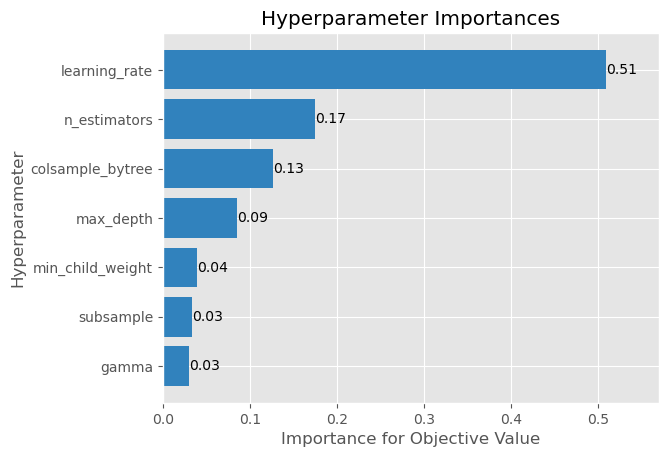

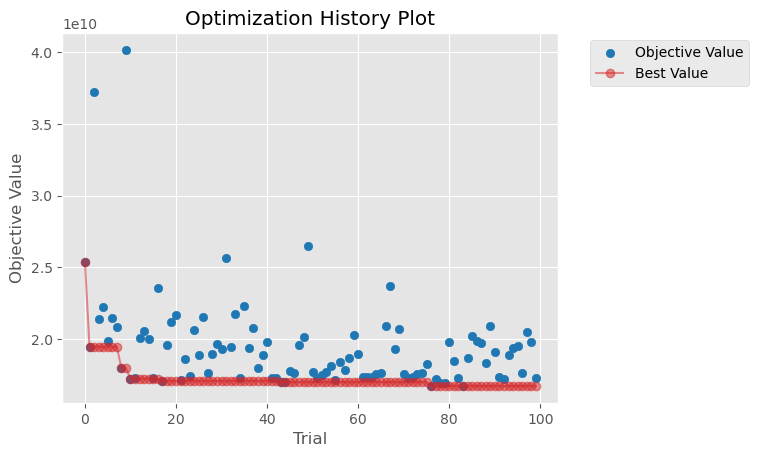

In [22]:
from optuna.visualization.matplotlib import plot_param_importances
from optuna.visualization.matplotlib import plot_optimization_history

# 하이퍼파라미터별 중요도 확인
plot_param_importances(study4)

# 하이퍼파라미터 최적화 과정 확인
import matplotlib.pyplot as plt
import numpy as np
plot_optimization_history(study4)